In [1]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.9 MB/s eta 0:00:00


# PILO+SFN group analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import seaborn as sns
import math

**Data loading and processing**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_sfn4 = '/content/drive/MyDrive/eeg data/combined_df_sfn_4-8.csv'
path_sfn12 = '/content/drive/MyDrive/eeg data/combined_df_sfn_12-16.csv'

In [5]:
df_4 = pd.read_csv(path_sfn4)
df_12 = pd.read_csv(path_sfn12)

In [6]:
# Load csv files 4-8 and 12-16 hours
pathes = [path_sfn4, path_sfn12]

dataframes = []

for path in pathes:
    df = pd.read_csv(path)
    dataframes.append(df)

# datasets concatanation
sfn_df = pd.concat(dataframes, ignore_index=True)
sfn_df = sfn_df.drop(columns=['Dataset'])
sfn_df.head()


,Example_names,F1_th/al,F1_th/beta,F1_th/gama,F2_th/al,F2_th/beta,F2_th/gama,T1_th/al,T1_th/beta,T1_th/gama,...,O1_th/gama,O2_th/al,O2_th/beta,O2_th/gama,Example,Day_time_h,Event_type,SFN_treat,Num_per_h,Dur_per_h
0,SFN5_200612-201111_064035-EegAnt01_SFN5_200612...,0.303923,0.496181,10.885300,0.355308,0.850647,10.755663,0.293081,0.522609,7.500884,...,17.841168,0.388827,1.110670,14.945983,SFN5,4-8,IED,SFN,1.318681,2.241758
1,SFN5_200612-201111_064035-EegAnt01_SFN5_200612...,0.557589,1.071313,13.360033,0.549725,1.491283,21.256637,0.519533,1.215525,17.515866,...,25.141426,0.646865,2.172541,28.419756,SFN5,4-8,IED,SFN,1.318681,2.241758
2,SFN5_200612-201206_042847-EegAnt01_SFN5_200612...,0.944214,1.354168,21.202779,0.541942,1.358890,22.764304,0.542625,0.542625,20.282559,...,22.237803,0.463340,1.319289,25.841921,SFN5,4-8,IED,SFN,2.637363,4.659341
3,SFN5_200612-201206_042847-EegAnt01_SFN5_200612...,0.821891,1.199980,12.838480,0.661884,2.413137,22.709565,0.583282,0.583282,18.570843,...,37.102930,0.699930,2.950424,26.469571,SFN5,4-8,IED,SFN,2.637363,4.659341
4,SFN5_200612-201206_042847-EegAnt01_SFN5_200612...,0.627535,0.593965,9.622279,0.597477,1.374812,21.847843,0.568168,0.568168,36.321022,...,51.529803,0.698158,2.056541,33.272523,SFN5,4-8,IED,SFN,2.637363,4.659341


In [7]:
sfn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Example_names  1499 non-null   object 
 1   F1_th/al       1499 non-null   float64
 2   F1_th/beta     1499 non-null   float64
 3   F1_th/gama     1499 non-null   float64
 4   F2_th/al       1499 non-null   float64
 5   F2_th/beta     1499 non-null   float64
 6   F2_th/gama     1499 non-null   float64
 7   T1_th/al       1499 non-null   float64
 8   T1_th/beta     1499 non-null   float64
 9   T1_th/gama     1499 non-null   float64
 10  T2_th/al       1499 non-null   float64
 11  T2_th/beta     1499 non-null   float64
 12  T2_th/gama     1499 non-null   float64
 13  P1_th/al       1499 non-null   float64
 14  P1_th/beta     1499 non-null   float64
 15  P1_th/gama     1499 non-null   float64
 16  P2_th/al       1499 non-null   float64
 17  P2_th/beta     1499 non-null   float64
 18  P2_th/ga

In [8]:
sfn_df.shape

(1499, 31)

In [9]:
sfn_df.describe()

,F1_th/al,F1_th/beta,F1_th/gama,F2_th/al,F2_th/beta,F2_th/gama,T1_th/al,T1_th/beta,T1_th/gama,T2_th/al,...,P2_th/beta,P2_th/gama,O1_th/al,O1_th/beta,O1_th/gama,O2_th/al,O2_th/beta,O2_th/gama,Num_per_h,Dur_per_h
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,...,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,0.533723,1.411927,16.280420,0.554947,1.556782,19.313743,0.510308,1.311958,16.892692,0.486574,...,2.120253,20.398274,0.592703,2.212218,26.363277,0.585702,2.090884,23.856388,7.511528,125.566583
std,0.148242,0.950821,9.405364,0.136152,0.860144,9.075717,0.115503,0.589002,7.165193,0.100319,...,0.980099,9.412064,0.146763,1.090603,12.122062,0.140480,1.052604,10.567531,5.121319,117.787074
min,0.187666,0.124560,0.966172,0.216447,0.083773,1.562048,0.206991,0.173120,0.328440,0.223701,...,0.275941,2.448550,0.201330,0.265224,2.807936,0.221849,0.240874,2.086429,0.439560,0.659341
25%,0.425507,0.711611,9.435847,0.464092,0.863385,12.863373,0.432087,0.849090,11.735681,0.419158,...,1.371688,13.233193,0.486808,1.324278,17.044565,0.490640,1.263400,15.812263,3.516484,17.098901
50%,0.534421,1.068916,13.472356,0.577491,1.432942,18.202662,0.525648,1.257746,16.545006,0.499649,...,2.008723,19.056380,0.620432,2.100964,25.099369,0.608290,1.945357,22.695233,6.153846,73.186813
75%,0.642308,1.943928,21.189043,0.658752,2.083093,24.780756,0.592461,1.701928,21.566590,0.559009,...,2.745825,26.264055,0.705266,2.994458,34.330225,0.692000,2.735608,30.534925,11.428571,228.000000
max,0.988131,4.849568,49.143627,0.907109,4.740144,55.223144,0.905598,3.596729,42.857845,0.787583,...,5.964377,60.121273,0.983220,5.643152,71.618484,0.900867,6.111108,67.093938,21.978022,347.032967


In [10]:
# Receiving the list of columns with EEG ratio data for figures
all_columns = sfn_df.columns.tolist()
columns_to_remove = ['Example_names', 'Example', 'Day_time_h', 'Event_type', 'SFN_treat', 'Num_per_h', 'Dur_per_h']
columns = [col for col in all_columns if col not in columns_to_remove]

print(columns)

['F1_th/al', 'F1_th/beta', 'F1_th/gama', 'F2_th/al', 'F2_th/beta', 'F2_th/gama', 'T1_th/al', 'T1_th/beta', 'T1_th/gama', 'T2_th/al', 'T2_th/beta', 'T2_th/gama', 'P1_th/al', 'P1_th/beta', 'P1_th/gama', 'P2_th/al', 'P2_th/beta', 'P2_th/gama', 'O1_th/al', 'O1_th/beta', 'O1_th/gama', 'O2_th/al', 'O2_th/beta', 'O2_th/gama']


In [11]:
# Saving concatenated dataset with SFN data on Google Drive
file_path = '/content/drive/MyDrive/eeg data/sfn_df.csv'
sfn_df.to_csv(file_path, index=False)
print(f"Файл збережено в {file_path}")

Файл збережено в /content/drive/MyDrive/eeg data/sfn_df.csv


**Mann Whitney U-test, p-value calculation**

In [12]:
# Mannwhitneyu U-test, p-value calculation
results = []

# Iteration by numerical columns
for col in columns:
    data_1 = df_4[col].values
    data_2 = df_12[col].values

    stat_12, p_12 = mannwhitneyu(data_1, data_2)

    results.append({
        'Column': col,
        'Stat_4-8_vs_12-16': stat_12,
        'P_4-8_vs_12-16': p_12,
    })

results_df = pd.DataFrame(results)
results_df = results_df.round(5)
results_df

,Column,Stat_4-8_vs_12-16,P_4-8_vs_12-16
0,F1_th/al,281439.0,0.00209
1,F1_th/beta,248275.0,0.28821
2,F1_th/gama,262890.0,0.44612
3,F2_th/al,282405.0,0.00139
4,F2_th/beta,242750.0,0.07984
5,F2_th/gama,288519.0,0.00007
6,T1_th/al,297290.0,0.00000
7,T1_th/beta,277192.0,0.01087
8,T1_th/gama,337896.0,0.00000
9,T2_th/al,273755.0,0.03418


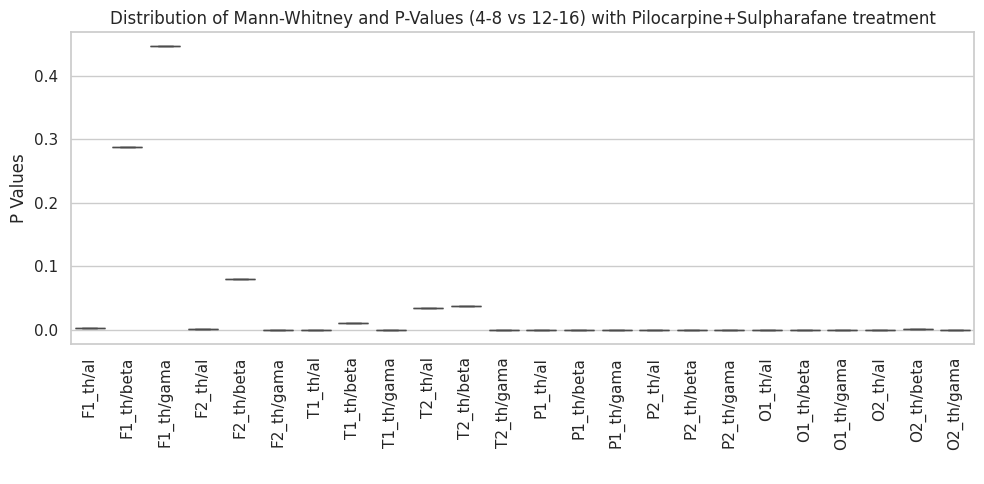

In [13]:
# Mann-Whitney U-test visualisation
results_df = pd.DataFrame({
    ' ': columns,
    'P Values': [result['P_4-8_vs_12-16'] for result in results]
})

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

plt.subplot(1, 1, 1)
sns.boxplot(x=' ', y='P Values', data=results_df)
plt.xticks(rotation=90)
plt.title('Distribution of Mann-Whitney and P-Values (4-8 vs 12-16) with Pilocarpine+Sulpharafane treatment')

plt.tight_layout()
plt.savefig('Mann-Whitney P-Values (4-8 vs 12-16) PILO+SFN')


Based on the provided data, we can make the following conclusions about the statistical comparisons between the two time periods 4-8 and 12-16 in the group with Pilocarpine+Sulpharafane treatment:

**Time-Dependent Changes:**

For most columns, there is a statistically significant change (p < 0.05) in the variable between the 4-8 and 12-16 periods. This could imply that the variable being measured changes noticeably across these time intervals.

Non-Significant Differences (P ≥ 0.05):

Some columns, especially those in the beta category (e.g., F1_th/beta, F2_th/beta, T2_th/beta), show p-values above 0.05, suggesting no significant difference between the two periods

Practical Implications:

If these results are related to EEG data or any time-dependent biological measurements, they suggest that the timing of measurements can significantly affect the outcomes, particularly in certain frequency bands or measurement categories. This could have implications for experimental design and timing in research or clinical practice.

In [14]:
# Function for calculating Mann-Whitney U test p-values
def calculate_mannwhitneyu(df1, df2, columns):
    mw_results = {}
    for column in columns:
        if column in df1.columns and column in df2.columns:

            sample1 = df1[column].dropna()
            sample2 = df2[column].dropna()

            # Calculate Mann-Whitney U test p-value
            if len(sample1) > 0 and len(sample2) > 0:
                _, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')
                mw_results[column] = round(p_value, 5)
            else:
                mw_results[column] = np.nan

    # Convert results to DataFrame
    mw_results_df = pd.DataFrame(mw_results, index=['p_value']).T
    return mw_results_df

# Call the function calculate_mannwhitneyu ()
mw_results_df = calculate_mannwhitneyu(df_4, df_12, columns)

**Visulazation Mann-Whitney U test, p-values by ratios with total data with Pilocarpine+Sulpharafane treatment**

In [15]:
# Columns title replacement
column_replacement = {
    'F1_th/al': 'F1', 'F2_th/al': 'F2', 'T1_th/al': 'T1', 'T2_th/al': 'T2',
    'P1_th/al': 'P1', 'P2_th/al': 'P2', 'O1_th/al': 'O1', 'O2_th/al': 'O2',
    'F1_th/beta': 'F1', 'F2_th/beta': 'F2', 'T1_th/beta': 'T1', 'T2_th/beta': 'T2',
    'P1_th/beta': 'P1', 'P2_th/beta': 'P2', 'O1_th/beta': 'O1', 'O2_th/beta': 'O2',
    'F1_th/gama': 'F1', 'F2_th/gama': 'F2', 'T1_th/gama': 'T1', 'T2_th/gama': 'T2',
    'P1_th/gama': 'P1', 'P2_th/gama': 'P2', 'O1_th/gama': 'O1', 'O2_th/gama': 'O2'
}

# Dividing columns on three groups
groups = {
    'Theta/Alpha': ['F1_th/al', 'F2_th/al', 'T1_th/al', 'T2_th/al', 'P1_th/al', 'P2_th/al', 'O1_th/al', 'O2_th/al'],
    'Theta/Beta': ['F1_th/beta', 'F2_th/beta', 'T1_th/beta', 'T2_th/beta', 'P1_th/beta', 'P2_th/beta', 'O1_th/beta', 'O2_th/beta'],
    'Theta/Gamma': ['F1_th/gama', 'F2_th/gama', 'T1_th/gama', 'T2_th/gama', 'P1_th/gama', 'P2_th/gama', 'O1_th/gama', 'O2_th/gama']
}

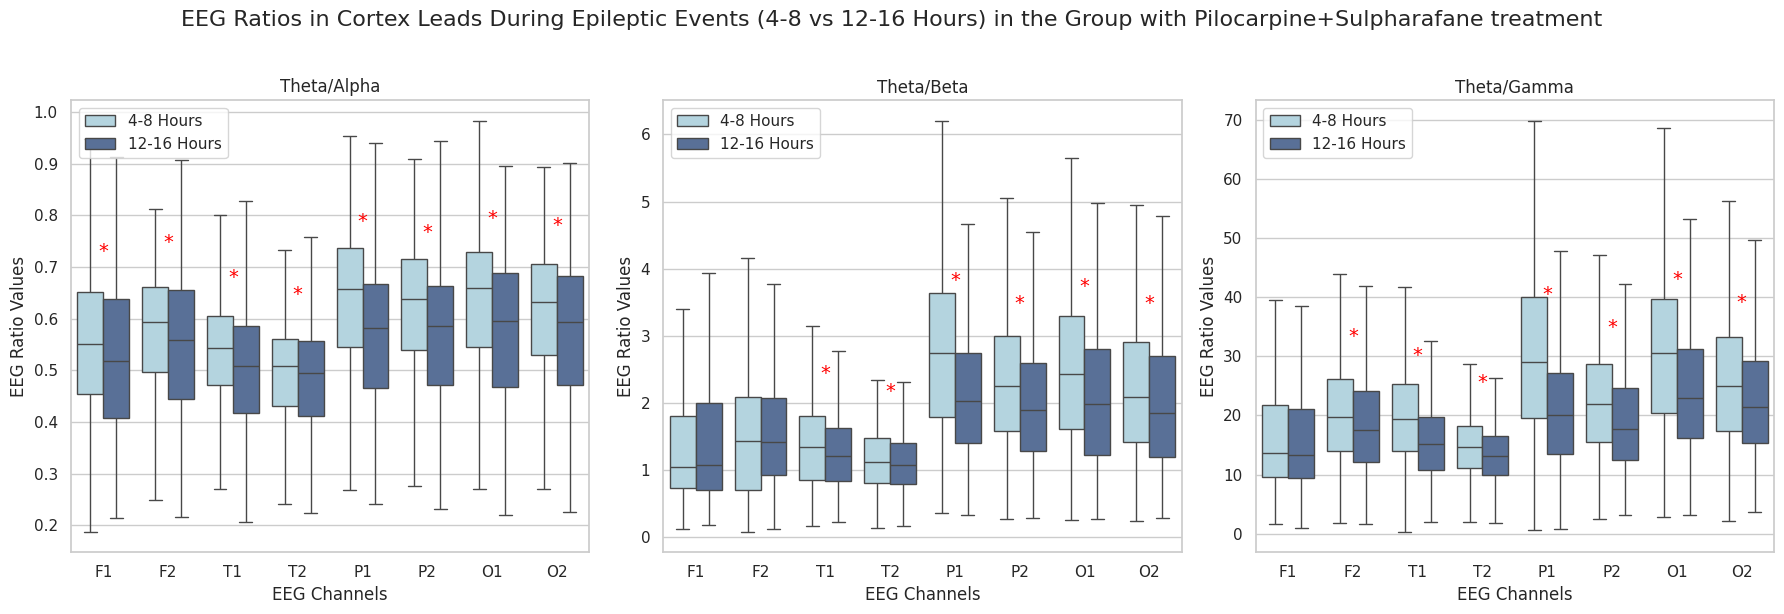

In [16]:
# Visulazation Mann-Whitney U test, p-values by ratios with total data with Pilocarpine+Sulpharafane treatment

# Create figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for ax, (group_name, group_columns) in zip(axes, groups.items()):
    data_4 = df_4[group_columns].copy()
    data_4['Interval'] = '4-8 Hours'
    data_12 = df_12[group_columns].copy()
    data_12['Interval'] = '12-16 Hours'

    combined_data = pd.concat([data_4, data_12], ignore_index=True)
    plot_data = pd.melt(combined_data, id_vars=['Interval'], value_vars=group_columns,
                        var_name='Channel', value_name='Value')
    plot_data['Channel'] = plot_data['Channel'].replace(column_replacement)

    # Plot boxplot
    sns.boxplot(x='Channel', y='Value', hue='Interval', data=plot_data, ax=ax, showfliers=False,
                palette={"4-8 Hours": "lightblue", "12-16 Hours": "#4f6da1"})
    ax.set_title(group_name)
    ax.set_ylabel('EEG Ratio Values')
    ax.set_xlabel('EEG Channels')
    ax.legend(loc='upper left')

# Iteration through the group columns and plot for each subplot
    for i, channel in enumerate(group_columns):
        if channel in mw_results_df.index and mw_results_df.loc[channel, 'p_value'] < 0.05:

            # Setting the Upper quartile (75th percentile) value for the channels in the current subplot
            y_max = plot_data[plot_data['Channel'] == column_replacement[channel]]['Value'].quantile(0.75)

            # Determine which EEG ratio is being processed and adjust the y_max accordingly
            if 'th/al' in channel.lower():
                y_max_offset = y_max + 0.07
            elif 'th/beta' in channel.lower():
                y_max_offset = y_max + 0.6
            elif 'th/gama' in channel.lower():
                y_max_offset = y_max + 7
            else:
                y_max_offset = y_max + 0.1

            # Add the asterisk for significant p-value
            ax.text(i, y_max_offset, '*', ha='center', va='bottom', color='red', fontsize=14)

plt.suptitle('EEG Ratios in Cortex Leads During Epileptic Events (4-8 vs 12-16 Hours) in the Group with Pilocarpine+Sulpharafane treatment', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('Mannwhitneyu test 4-8 vs 12-16 hours sfn totally.png')
plt.show()


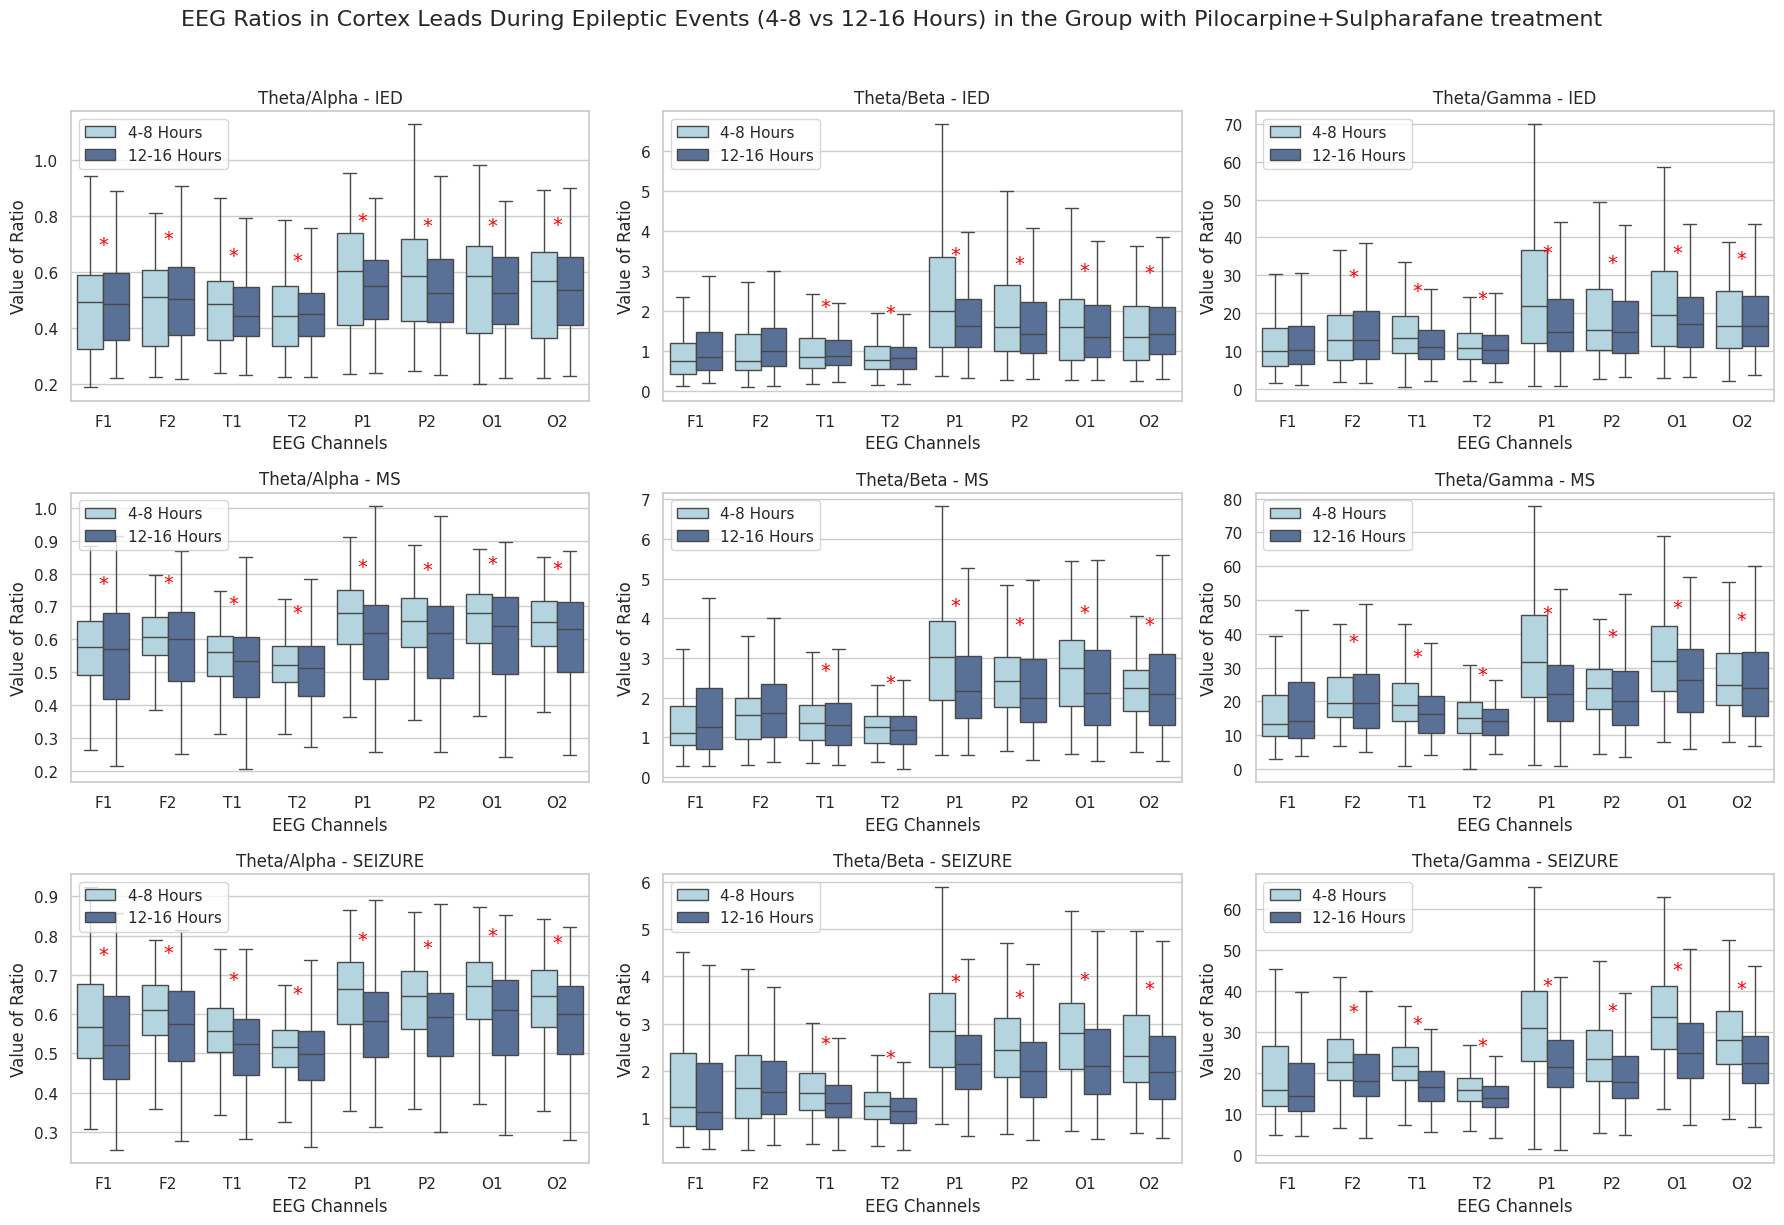

In [17]:
# Visulazation Mann-Whitney U test p-values by ratios and by Epileptical events with Pilocarpine+Sulpharafane treatment

# Define conditions
conditions = ['IED', 'MS', 'SEIZURE']

# Create figure and subplots
fig, axes = plt.subplots(nrows=len(conditions), ncols=len(groups), figsize=(18, 12))

# Iterate over conditions and EEG ratios
for i, condition in enumerate(conditions):
    for j, (group_name, group_columns) in enumerate(groups.items()):

        # Filter data for the current condition (IED, MS, Seizure)
        df_condition_4 = df_4[df_4['Event_type'] == condition]
        df_condition_12 = df_12[df_12['Event_type'] == condition]

        # Prepare data for plotting
        data_4 = df_condition_4[group_columns].copy()
        data_4['Interval'] = '4-8 Hours'
        data_12 = df_condition_12[group_columns].copy()
        data_12['Interval'] = '12-16 Hours'

        # Combine data
        combined_data = pd.concat([data_4, data_12], ignore_index=True)
        plot_data = pd.melt(combined_data, id_vars=['Interval'], value_vars=group_columns,
                            var_name='Channel', value_name='Value')
        plot_data['Channel'] = plot_data['Channel'].replace(column_replacement)

        # Plot boxplot
        ax = axes[i, j]  # Get the subplot for the current condition and EEG ratio
        sns.boxplot(x='Channel', y='Value', hue='Interval', data=plot_data, ax=ax, showfliers=False,
                    palette={"4-8 Hours": "lightblue", "12-16 Hours": "#4f6da1"})

        # Set the title and labels
        ax.set_title(f'{group_name} - {condition}')
        ax.set_ylabel('Value of Ratio')
        ax.set_xlabel('EEG Channels')
        ax.legend(loc='upper left')

        # Add asterisks for significant p-values from Mann-Whitney U test
        for k, channel in enumerate(group_columns):
            if channel in mw_results_df.index and mw_results_df.loc[channel, 'p_value'] < 0.05:
                # Get the upper quartile (75th percentile) value for the channel in the current subplot
                y_max = plot_data[plot_data['Channel'] == column_replacement[channel]]['Value'].quantile(0.75)

                # Adjust the offset for the y_max based on EEG ratio
                if 'th/al' in channel.lower():
                    y_max_offset = y_max + 0.07
                elif 'th/beta' in channel.lower():
                    y_max_offset = y_max + 0.6
                elif 'th/gama' in channel.lower():
                    y_max_offset = y_max + 7
                else:
                    y_max_offset = y_max + 0.1

                # Add the asterisk for significant p-value
                ax.text(k, y_max_offset, '*', ha='center', va='bottom', color='red', fontsize=14)

plt.suptitle('EEG Ratios in Cortex Leads During Epileptic Events (4-8 vs 12-16 Hours) in the Group with Pilocarpine+Sulpharafane treatment', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('Mannwhitneyu test 4-8 vs 12-16 hours sfn by events.png')
plt.show()


# Pilo Group Analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import seaborn as sns

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loding and processing data**

In [20]:
# Load datasets 4-8 and 12-16 hours
path_pilo4 = '/content/drive/MyDrive/eeg data/combined_df_4-8.csv'
path_pilo12 = '/content/drive/MyDrive/eeg data/combined_df_12-16.csv'

In [21]:

df_4_pilo = pd.read_csv(path_pilo4)
df_4_pilo = df_4_pilo.drop(columns='Dataset')
df_12_pilo = pd.read_csv(path_pilo12)
df_4_pilo['Event_type'] = df_4_pilo['Event_type'].replace('Seizure', 'SEIZURE')
# Перевірка результату
unique_values_4 = df_4_pilo['Event_type'].unique()
print(f"Unique values in 4-8 dataset after replacement: {unique_values_4}")

Unique values in 4-8 dataset after replacement: ['IED' 'MS' 'SEIZURE']


In [22]:
# Вказуємо конкретні шляхи до файлів
pathes = [path_pilo4, path_pilo12]

# Список для зберігання датафреймів
dataframes = []

# Перебір всіх шляхів і зчитування їх у датафрейми
for path in pathes:
    df = pd.read_csv(path)
    dataframes.append(df)

# Об'єднання всіх датафреймів в один
pilo_df = pd.concat(dataframes, ignore_index=True)
pilo_df= pilo_df.drop(columns='Dataset')
# Перегляд перших кількох рядків об'єднаppного датафрейму
pilo_df.tail()


,Example_names,F1_th/al,F1_th/beta,F1_th/gama,F2_th/al,F2_th/beta,F2_th/gama,T1_th/al,T1_th/beta,T1_th/gama,...,O1_th/gama,O2_th/al,O2_th/beta,O2_th/gama,Example,Day_time_h,Event_type,SFN_treat,Num_per_h,Dur_per_h
1823,SFN4_200612-201201_152114-EegAnt01_SFN4_200612...,0.376390,0.808605,14.442618,0.354407,0.646204,12.138190,0.413740,0.983833,23.487378,...,13.437017,0.360715,0.590758,7.511864,SFN4,12-16,SEIZURE,No_SFN,7.912088,12.0
1824,SFN4_200612-201201_152114-EegAnt01_SFN4_200612...,0.444862,0.883468,14.071816,0.413103,0.788776,13.421757,0.410607,0.911440,20.187075,...,14.771327,0.456566,0.861803,11.286298,SFN4,12-16,SEIZURE,No_SFN,7.912088,12.0
1825,SFN4_200612-201201_152114-EegAnt01_SFN4_200612...,0.471139,0.874434,11.718948,0.449249,0.813695,11.918224,0.431847,0.903160,16.261716,...,13.442645,0.508233,0.921530,9.931513,SFN4,12-16,SEIZURE,No_SFN,7.912088,12.0
1826,SFN4_200612-201201_152114-EegAnt01_SFN4_200612...,0.377731,0.824558,13.373822,0.348138,0.699460,12.694106,0.371347,0.898335,16.742484,...,13.953187,0.369664,0.693528,9.799755,SFN4,12-16,SEIZURE,No_SFN,7.912088,12.0
1827,SFN4_200612-201201_152114-EegAnt01_SFN4_200612...,0.534603,1.093385,19.617927,0.472650,0.777563,13.089325,0.474034,1.066304,24.289437,...,20.030298,0.517533,0.879643,13.251053,SFN4,12-16,SEIZURE,No_SFN,7.912088,12.0


In [23]:
pilo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Example_names  1828 non-null   object 
 1   F1_th/al       1828 non-null   float64
 2   F1_th/beta     1828 non-null   float64
 3   F1_th/gama     1828 non-null   float64
 4   F2_th/al       1828 non-null   float64
 5   F2_th/beta     1828 non-null   float64
 6   F2_th/gama     1828 non-null   float64
 7   T1_th/al       1828 non-null   float64
 8   T1_th/beta     1828 non-null   float64
 9   T1_th/gama     1828 non-null   float64
 10  T2_th/al       1828 non-null   float64
 11  T2_th/beta     1828 non-null   float64
 12  T2_th/gama     1828 non-null   float64
 13  P1_th/al       1828 non-null   float64
 14  P1_th/beta     1828 non-null   float64
 15  P1_th/gama     1828 non-null   float64
 16  P2_th/al       1828 non-null   float64
 17  P2_th/beta     1828 non-null   float64
 18  P2_th/ga

In [24]:
pilo_df.shape

(1828, 31)

In [25]:
pilo_df.describe()

,F1_th/al,F1_th/beta,F1_th/gama,F2_th/al,F2_th/beta,F2_th/gama,T1_th/al,T1_th/beta,T1_th/gama,T2_th/al,...,P2_th/beta,P2_th/gama,O1_th/al,O1_th/beta,O1_th/gama,O2_th/al,O2_th/beta,O2_th/gama,Num_per_h,Dur_per_h
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,...,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,0.533389,1.297956,19.358840,0.460136,0.948718,15.180385,0.473559,1.087499,21.126841,0.442655,...,2.471691,28.095285,0.555401,1.884339,24.028138,0.562322,1.629428,21.496953,8.933561,85.735701
std,0.123219,0.611573,7.920185,0.102486,0.411745,5.615621,0.102170,0.444031,8.369368,0.090647,...,1.206536,13.353953,0.125591,0.942661,9.970343,0.132762,0.828396,10.042382,9.337769,130.958583
min,0.178928,0.221852,2.830324,0.188598,0.171019,2.154394,0.196960,0.233134,2.068859,0.199740,...,0.255739,3.563116,0.177930,0.223774,3.638405,0.181904,0.201250,0.743387,0.439560,0.879121
25%,0.451770,0.837461,13.711783,0.385731,0.654346,11.317991,0.404032,0.744944,14.947938,0.381633,...,1.530184,17.397091,0.473411,1.208650,17.184996,0.470092,0.955691,13.445085,2.637363,6.681319
50%,0.546806,1.199557,18.544312,0.467538,0.880517,14.827709,0.481424,1.062703,20.837578,0.450162,...,2.317330,26.586644,0.565566,1.651036,22.508205,0.580912,1.518148,20.378166,4.835165,13.362637
75%,0.618427,1.653594,24.070465,0.537330,1.173141,18.662671,0.546152,1.355578,26.650486,0.506745,...,3.248588,36.550729,0.641086,2.398268,28.473711,0.660986,2.145589,28.389541,12.747253,124.923077
max,0.945737,3.595473,49.212320,0.784596,2.561602,35.869435,0.824222,2.812671,49.570914,0.724241,...,7.522147,75.005000,0.923346,6.298256,75.756434,0.923309,4.528230,60.018301,38.241758,615.648352


In [26]:
# Get the list of all columns
all_columns = pilo_df.columns.tolist()

columns_to_remove = ['Example_names', 'Example', 'Day_time_h', 'Event_type', 'SFN_treat', 'Num_per_h', 'Dur_per_h']
columns = [col for col in all_columns if col not in columns_to_remove]

print(columns)

['F1_th/al', 'F1_th/beta', 'F1_th/gama', 'F2_th/al', 'F2_th/beta', 'F2_th/gama', 'T1_th/al', 'T1_th/beta', 'T1_th/gama', 'T2_th/al', 'T2_th/beta', 'T2_th/gama', 'P1_th/al', 'P1_th/beta', 'P1_th/gama', 'P2_th/al', 'P2_th/beta', 'P2_th/gama', 'O1_th/al', 'O1_th/beta', 'O1_th/gama', 'O2_th/al', 'O2_th/beta', 'O2_th/gama']


In [27]:
# Збереження файла на Google Drive
file_path = '/content/drive/MyDrive/eeg data/pilo_df.csv'
sfn_df.to_csv(file_path, index=False)
print(f"Файл збережено в {file_path}")

Файл збережено в /content/drive/MyDrive/eeg data/pilo_df.csv


**Mann Whitney U-test calculation**

In [28]:
from scipy.stats import mannwhitneyu
# Зберігання результатів
results = []

# Ітерація по числових колонках і виконання тесту Манна-Вітні
for col in columns:
    data_1 = df_4_pilo[col].values
    data_2 = df_12_pilo[col].values


    # Пара порівняння: Data 1 vs Data 2
    stat_12, p_12 = mannwhitneyu(data_1, data_2)

    # Зберігання результатів
    results.append({
        'Column': col,
        'Stat_4-8_vs_12-16': stat_12,
        'P_4-8_vs_12-16': p_12,
    })

# Створення DataFrame з результатами
results_df_pilo = pd.DataFrame(results)
results_df_pilo= results_df_pilo.round(5)
results_df_pilo

,Column,Stat_4-8_vs_12-16,P_4-8_vs_12-16
0,F1_th/al,405394.0,0.03257
1,F1_th/beta,451921.0,0.00000
2,F1_th/gama,431229.0,0.00001
3,F2_th/al,418439.0,0.00082
4,F2_th/beta,433314.0,0.00000
5,F2_th/gama,429137.0,0.00001
6,T1_th/al,410263.0,0.00964
7,T1_th/beta,412631.0,0.00499
8,T1_th/gama,449849.0,0.00000
9,T2_th/al,404057.0,0.04407


**Time-dependent analysis**

The majority of EEG parameters demonstrate significant differences between the 4-8 and 12-16 hour intervals, particularly in beta and gamma frequency bands. These findings may indicate that brain activity exhibits meaningful temporal variations in these bands, potentially driven by underlying physiological or neurological factors.

Non-significant Differences:

Some parameters, including P1_th/al (p = 0.09542), P1_th/beta (p = 0.26862), and O1_th/gama (p = 0.75474), O1_th/al (0.32934) and P2_th/gama (0.11352) show p-values above 0.05, indicating no statistically significant difference.

**Visualization**

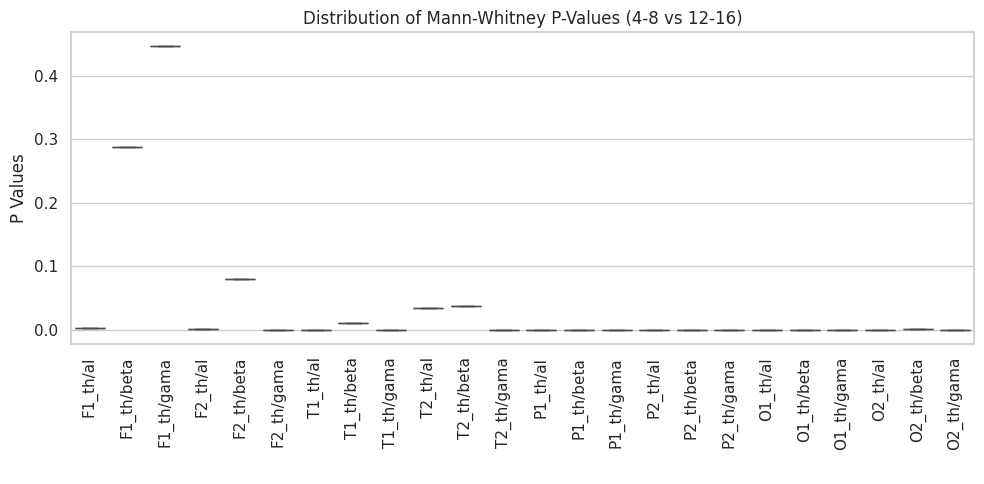

In [29]:
# Visualisation
results_df_pilo = pd.DataFrame({
    ' ': columns,
    'P Values': [result['P_4-8_vs_12-16'] for result in results]
})

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

plt.subplot(1, 1, 1)
sns.boxplot(x=' ', y='P Values', data=results_df)
plt.xticks(rotation=90)
plt.title('Distribution of Mann-Whitney P-Values (4-8 vs 12-16)')

plt.tight_layout()
plt.savefig('Pilo Mann-Whitney P-Values (4-8 vs 12-16)')
plt.show()


In [30]:
# Calculate p-values with Mann-Whitney U test
mw_results_df = calculate_mannwhitneyu(df_4_pilo, df_12_pilo, columns)

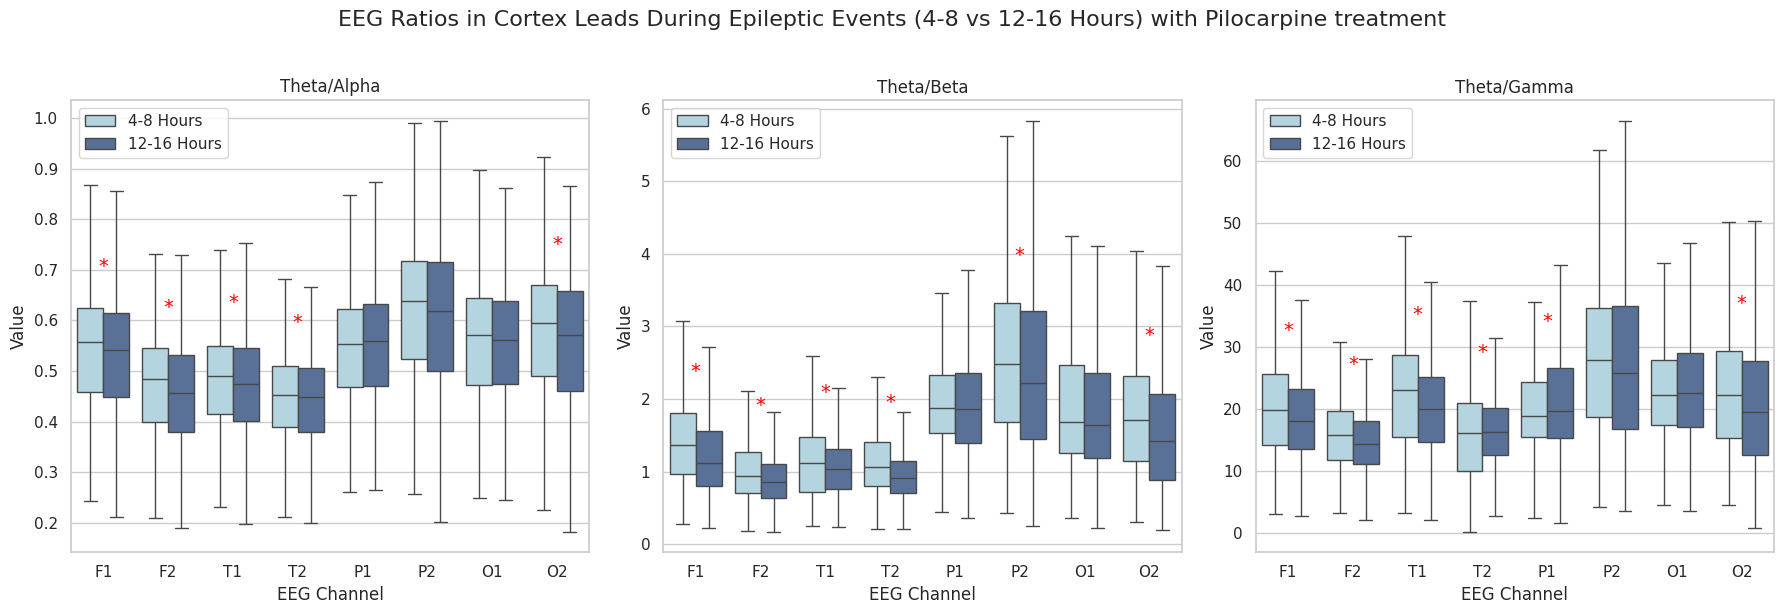

In [31]:
# Create figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for ax, (group_name, group_columns) in zip(axes, groups.items()):
    data_4 = df_4_pilo[group_columns].copy()
    data_4['Interval'] = '4-8 Hours'
    data_12 = df_12_pilo[group_columns].copy()
    data_12['Interval'] = '12-16 Hours'

    combined_data = pd.concat([data_4, data_12], ignore_index=True)
    plot_data = pd.melt(combined_data, id_vars=['Interval'], value_vars=group_columns,
                        var_name='Channel', value_name='Value')
    plot_data['Channel'] = plot_data['Channel'].replace(column_replacement)

    # Plot boxplot
    sns.boxplot(x='Channel', y='Value', hue='Interval', data=plot_data, ax=ax, showfliers=False,
                palette={"4-8 Hours": "lightblue", "12-16 Hours": "#4f6da1"})
    ax.set_title(group_name)
    ax.set_ylabel('Value')
    ax.set_xlabel('EEG Channel')
    ax.legend(loc='upper left')

# Iterate through the group columns and plot for each subplot
    for i, channel in enumerate(group_columns):

        if channel in mw_results_df.index and mw_results_df.loc[channel, 'p_value'] < 0.05:

            # Get the upper quartile (75th percentile) value for the channel in the current subplot
            y_max = plot_data[plot_data['Channel'] == column_replacement[channel]]['Value'].quantile(0.75)

            # Determine which EEG ratio is being processed and adjust the y_max accordingly
            if 'th/al' in channel.lower():
                y_max_offset = y_max + 0.07
            elif 'th/beta' in channel.lower():
                y_max_offset = y_max + 0.6
            elif 'th/gama' in channel.lower():
                y_max_offset = y_max + 7
            else:
                y_max_offset = y_max + 0.1

            # Add the asterisk for significant p-value
            ax.text(i, y_max_offset, '*', ha='center', va='bottom', color='red', fontsize=14)

plt.suptitle('EEG Ratios in Cortex Leads During Epileptic Events (4-8 vs 12-16 Hours) with Pilocarpine treatment', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('Mannwhitneyu test 4-8 vs 12-16 hours pilo totally.png')
plt.show()


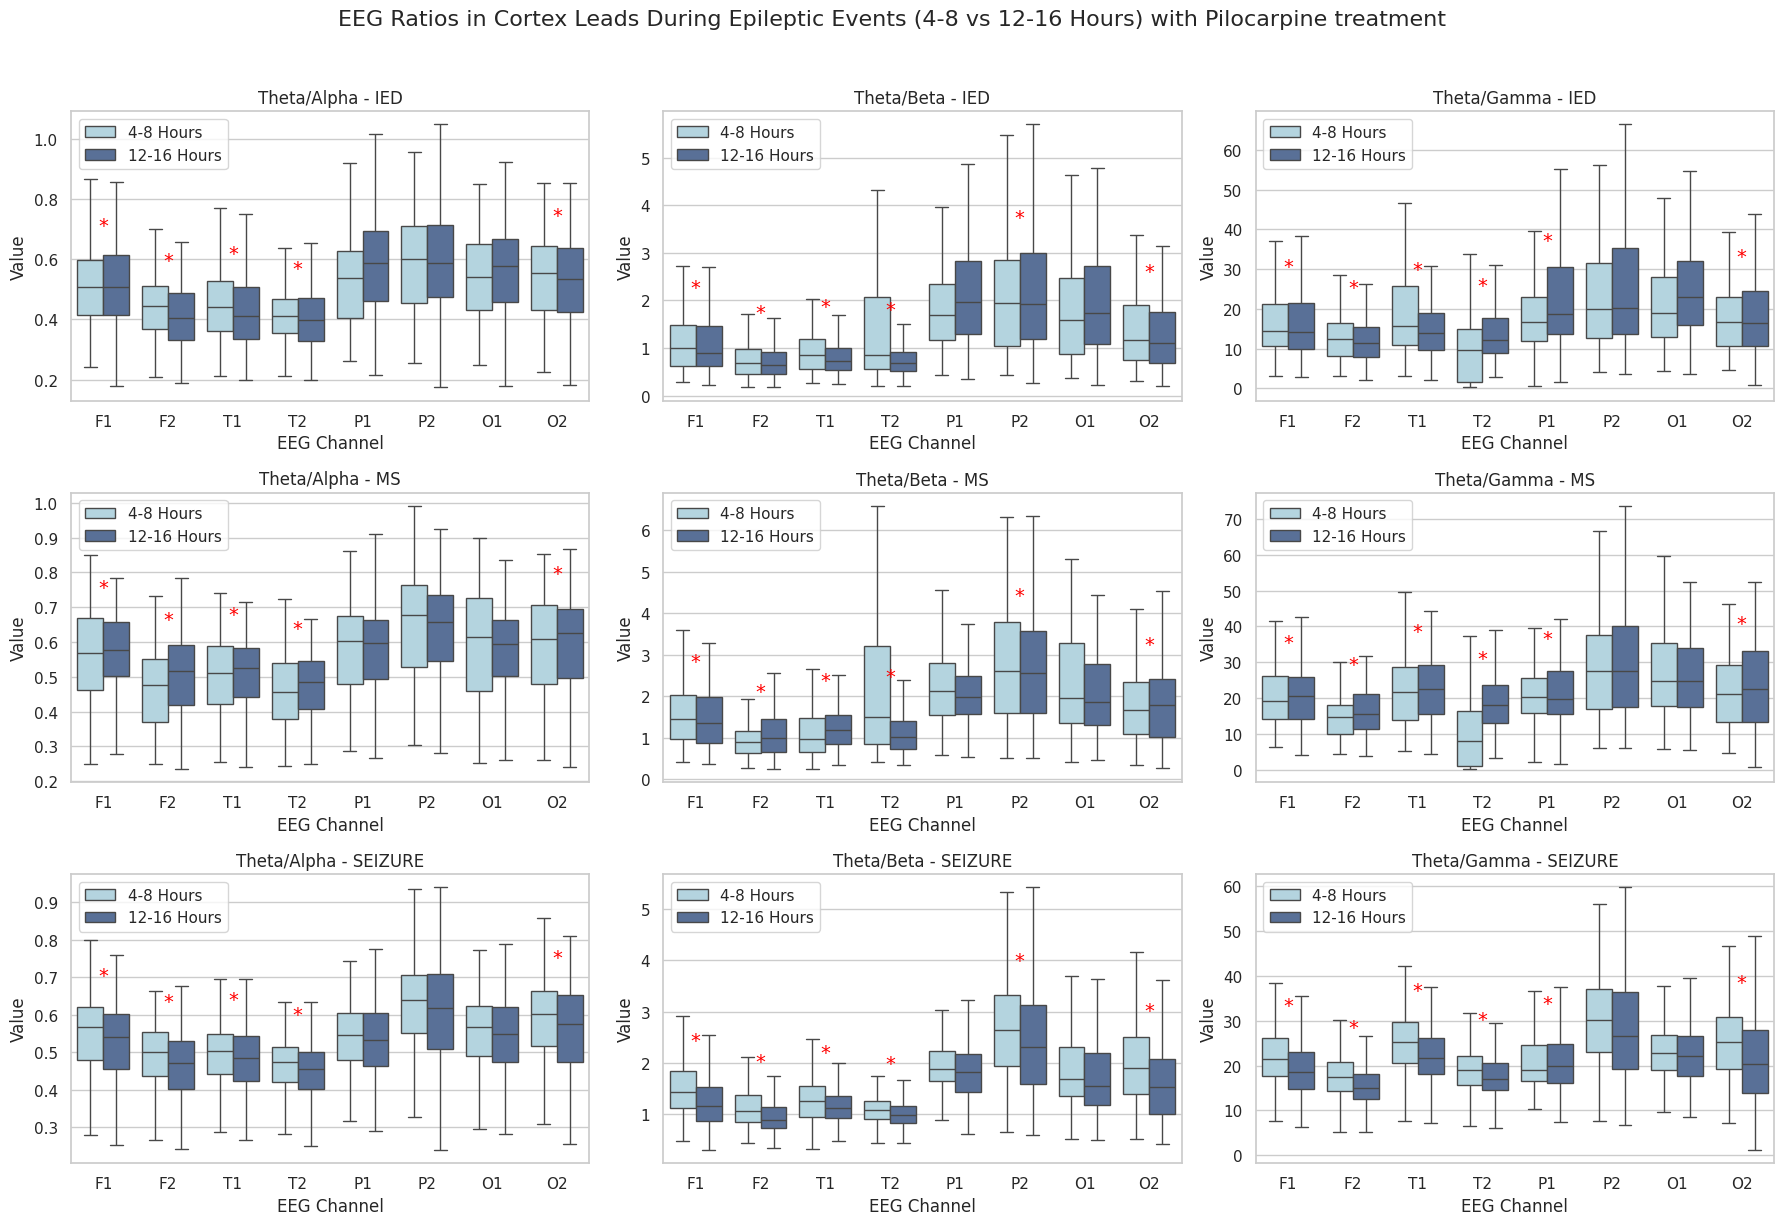

In [32]:
# Create figure and subplots
fig, axes = plt.subplots(nrows=len(conditions), ncols=len(groups), figsize=(18, 12))

# Iterate over conditions and EEG ratios
for i, condition in enumerate(conditions):
    for j, (group_name, group_columns) in enumerate(groups.items()):

        # Filter data for the current condition (IED, MS, Seizure)
        df_condition_4 = df_4_pilo[df_4_pilo['Event_type'] == condition]
        df_condition_12 = df_12_pilo[df_12_pilo['Event_type'] == condition]

        # Prepare data for plotting
        data_4 = df_condition_4[group_columns].copy()
        data_4['Interval'] = '4-8 Hours'
        data_12 = df_condition_12[group_columns].copy()
        data_12['Interval'] = '12-16 Hours'

        # Combine data
        combined_data = pd.concat([data_4, data_12], ignore_index=True)
        plot_data = pd.melt(combined_data, id_vars=['Interval'], value_vars=group_columns,
                            var_name='Channel', value_name='Value')
        plot_data['Channel'] = plot_data['Channel'].replace(column_replacement)

        # Plot boxplot
        ax = axes[i, j]  # Get the subplot for the current condition and EEG ratio
        sns.boxplot(x='Channel', y='Value', hue='Interval', data=plot_data, ax=ax, showfliers=False,
                    palette={"4-8 Hours": "lightblue", "12-16 Hours": "#4f6da1"})

        # Set the title and labels
        ax.set_title(f'{group_name} - {condition}')
        ax.set_ylabel('Value')
        ax.set_xlabel('EEG Channel')
        ax.legend(loc='upper left')

        # Add red asterisks for significant p-values from Mann-Whitney U test
        for k, channel in enumerate(group_columns):
            if channel in mw_results_df.index and mw_results_df.loc[channel, 'p_value'] < 0.05:
                # Get the upper quartile (75th percentile) value for the channel in the current subplot
                y_max = plot_data[plot_data['Channel'] == column_replacement[channel]]['Value'].quantile(0.75)

                # Adjust the offset for the y_max based on EEG ratio
                if 'th/al' in channel.lower():
                    y_max_offset = y_max + 0.07  # A small offset for Theta/Alpha
                elif 'th/beta' in channel.lower():
                    y_max_offset = y_max + 0.6  # Adjust the offset for Theta/Beta
                elif 'th/gama' in channel.lower():
                    y_max_offset = y_max + 7  # Adjust the offset for Theta/Gamma
                else:
                    y_max_offset = y_max + 0.1  # Default offset for other cases

                # Add the asterisk for significant p-value
                ax.text(k, y_max_offset, '*', ha='center', va='bottom', color='red', fontsize=14)

plt.suptitle('EEG Ratios in Cortex Leads During Epileptic Events (4-8 vs 12-16 Hours) with Pilocarpine treatment', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('Mannwhitneyu test 4-8 vs 12-16 hours pilo by events.png')
plt.show()

# PILO+SFN - Pilo Comparison

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import seaborn as sns

**Load and processing data**

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
path_pilo4 = '/content/drive/MyDrive/eeg data/combined_df_4-8.csv'
path_pilo12 = '/content/drive/MyDrive/eeg data/combined_df_12-16.csv'

In [36]:
path_sfn4 = '/content/drive/MyDrive/eeg data/combined_df_sfn_4-8.csv'
path_sfn12 = '/content/drive/MyDrive/eeg data/combined_df_sfn_12-16.csv'

In [37]:
df_4_sfn = pd.read_csv(path_sfn4)
df_4_sfn = df_4_sfn.drop(columns='Dataset')
df_4_sfn['Event_type'] = df_4_sfn['Event_type'].replace('Seizure', 'SEIZURE')
unique_values_4 = df_4_sfn['Event_type'].unique()

df_12_sfn = pd.read_csv(path_sfn12)
# df_12_sfn = df_12_sfn.drop(columns='Dataset')
df_4_sfn['Event_type'] = df_4_sfn['Event_type'].replace('Seizure', 'SEIZURE')
unique_values_12 = df_12_sfn['Event_type'].unique()

In [38]:
df_4_pilo = pd.read_csv(path_pilo4)
df_4_pilo = df_4_pilo.drop(columns='Dataset')
df_4_pilo['Event_type'] = df_4_pilo['Event_type'].replace('Seizure', 'SEIZURE')
unique_values_4 = df_4_pilo['Event_type'].unique()

df_12_pilo = pd.read_csv(path_pilo12)
unique_values_12 = df_12_pilo['Event_type'].unique()

In [39]:
pathes = [path_sfn4, path_sfn12, path_pilo4, path_pilo12]

# Список для зберігання датафреймів
dataframes = []

for path in pathes:
    df = pd.read_csv(path)
    dataframes.append(df)

totall_df = pd.concat(dataframes, ignore_index=True)
totall_df= totall_df.drop(columns='Dataset')

totall_df.tail()


,Example_names,F1_th/al,F1_th/beta,F1_th/gama,F2_th/al,F2_th/beta,F2_th/gama,T1_th/al,T1_th/beta,T1_th/gama,...,O1_th/gama,O2_th/al,O2_th/beta,O2_th/gama,Example,Day_time_h,Event_type,SFN_treat,Num_per_h,Dur_per_h
3322,SFN4_200612-201201_152114-EegAnt01_SFN4_200612...,0.376390,0.808605,14.442618,0.354407,0.646204,12.138190,0.413740,0.983833,23.487378,...,13.437017,0.360715,0.590758,7.511864,SFN4,12-16,SEIZURE,No_SFN,7.912088,12.0
3323,SFN4_200612-201201_152114-EegAnt01_SFN4_200612...,0.444862,0.883468,14.071816,0.413103,0.788776,13.421757,0.410607,0.911440,20.187075,...,14.771327,0.456566,0.861803,11.286298,SFN4,12-16,SEIZURE,No_SFN,7.912088,12.0
3324,SFN4_200612-201201_152114-EegAnt01_SFN4_200612...,0.471139,0.874434,11.718948,0.449249,0.813695,11.918224,0.431847,0.903160,16.261716,...,13.442645,0.508233,0.921530,9.931513,SFN4,12-16,SEIZURE,No_SFN,7.912088,12.0
3325,SFN4_200612-201201_152114-EegAnt01_SFN4_200612...,0.377731,0.824558,13.373822,0.348138,0.699460,12.694106,0.371347,0.898335,16.742484,...,13.953187,0.369664,0.693528,9.799755,SFN4,12-16,SEIZURE,No_SFN,7.912088,12.0
3326,SFN4_200612-201201_152114-EegAnt01_SFN4_200612...,0.534603,1.093385,19.617927,0.472650,0.777563,13.089325,0.474034,1.066304,24.289437,...,20.030298,0.517533,0.879643,13.251053,SFN4,12-16,SEIZURE,No_SFN,7.912088,12.0


In [40]:
totall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3327 entries, 0 to 3326
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Example_names  3327 non-null   object 
 1   F1_th/al       3327 non-null   float64
 2   F1_th/beta     3327 non-null   float64
 3   F1_th/gama     3327 non-null   float64
 4   F2_th/al       3327 non-null   float64
 5   F2_th/beta     3327 non-null   float64
 6   F2_th/gama     3327 non-null   float64
 7   T1_th/al       3327 non-null   float64
 8   T1_th/beta     3327 non-null   float64
 9   T1_th/gama     3327 non-null   float64
 10  T2_th/al       3327 non-null   float64
 11  T2_th/beta     3327 non-null   float64
 12  T2_th/gama     3327 non-null   float64
 13  P1_th/al       3327 non-null   float64
 14  P1_th/beta     3327 non-null   float64
 15  P1_th/gama     3327 non-null   float64
 16  P2_th/al       3327 non-null   float64
 17  P2_th/beta     3327 non-null   float64
 18  P2_th/ga

In [41]:
totall_df.shape

(3327, 31)

In [42]:
totall_df.describe()

,F1_th/al,F1_th/beta,F1_th/gama,F2_th/al,F2_th/beta,F2_th/gama,T1_th/al,T1_th/beta,T1_th/gama,T2_th/al,...,P2_th/beta,P2_th/gama,O1_th/al,O1_th/beta,O1_th/gama,O2_th/al,O2_th/beta,O2_th/gama,Num_per_h,Dur_per_h
count,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,...,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000
mean,0.533539,1.349306,17.971839,0.502853,1.222685,17.042695,0.490116,1.188630,19.219120,0.462443,...,2.313349,24.627350,0.572208,2.032067,25.080249,0.572856,1.837339,22.560011,8.292855,103.681746
std,0.135047,0.784762,8.754795,0.127846,0.719657,7.658414,0.109896,0.526337,8.126476,0.097591,...,1.123776,12.350159,0.136785,1.024912,11.051616,0.136769,0.963696,10.347578,7.759506,126.736805
min,0.178928,0.124560,0.966172,0.188598,0.083773,1.562048,0.196960,0.173120,0.328440,0.199740,...,0.255739,2.448550,0.177930,0.223774,2.807936,0.181904,0.201250,0.743387,0.439560,0.659341
25%,0.439359,0.776965,11.427725,0.407601,0.706203,11.737727,0.412964,0.781755,13.289829,0.395303,...,1.442454,15.276954,0.478007,1.241925,17.162144,0.480007,1.079840,14.637030,3.076923,10.637363
50%,0.543338,1.152398,16.528492,0.507766,1.032249,16.023252,0.498201,1.138901,18.801580,0.468076,...,2.169328,22.678761,0.585304,1.846004,23.381193,0.592571,1.710352,21.663250,5.714286,33.406593
75%,0.627526,1.740339,23.388446,0.593929,1.560662,21.135816,0.568331,1.497361,24.634761,0.532223,...,3.009975,31.778799,0.670002,2.697200,31.423102,0.675584,2.411318,29.391795,11.428571,186.945055
max,0.988131,4.849568,49.212320,0.907109,4.740144,55.223144,0.905598,3.596729,49.570914,0.787583,...,7.522147,75.005000,0.983220,6.298256,75.756434,0.923309,6.111108,67.093938,38.241758,615.648352


In [43]:
# Getting columns with EEG data
columns = totall_df.columns.tolist()

columns_to_remove = ['Example_names', 'Example', 'Day_time_h', 'Event_type', 'SFN_treat', 'Num_per_h', 'Dur_per_h']

columns = [col for col in columns if col not in columns_to_remove]

print(columns)

['F1_th/al', 'F1_th/beta', 'F1_th/gama', 'F2_th/al', 'F2_th/beta', 'F2_th/gama', 'T1_th/al', 'T1_th/beta', 'T1_th/gama', 'T2_th/al', 'T2_th/beta', 'T2_th/gama', 'P1_th/al', 'P1_th/beta', 'P1_th/gama', 'P2_th/al', 'P2_th/beta', 'P2_th/gama', 'O1_th/al', 'O1_th/beta', 'O1_th/gama', 'O2_th/al', 'O2_th/beta', 'O2_th/gama']


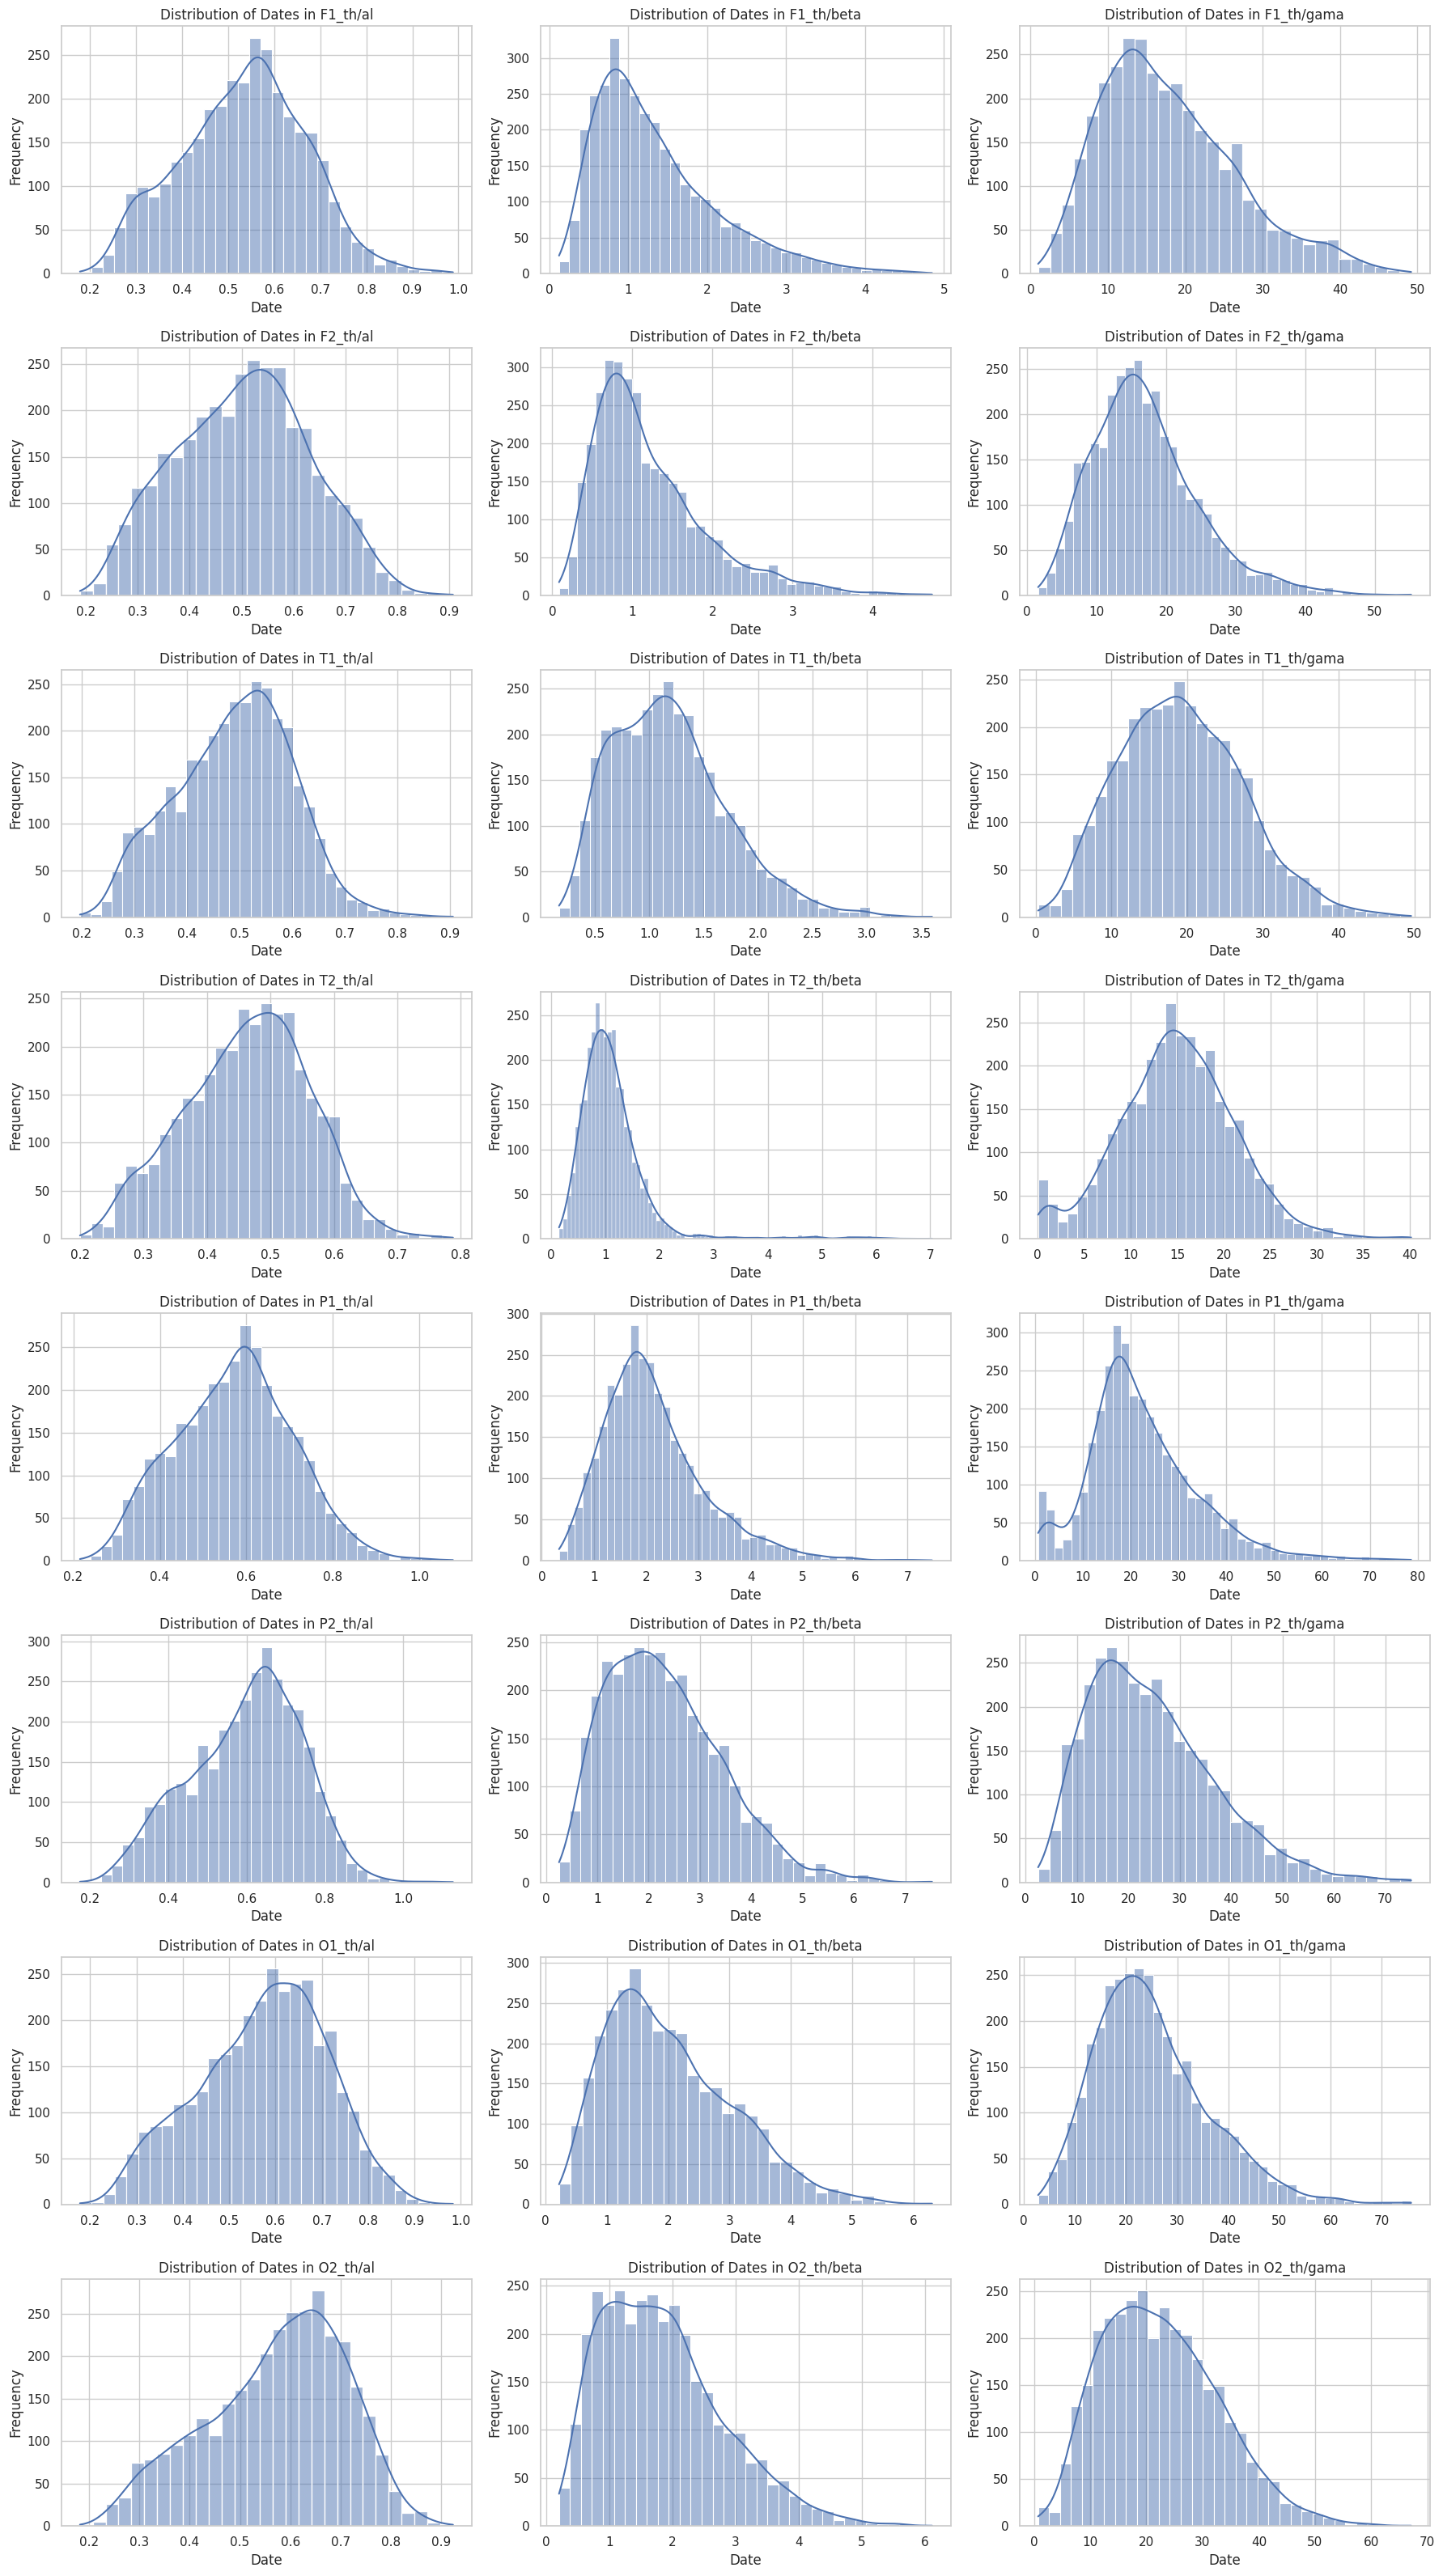

In [44]:
# Data dictribution visualization
import math

# Setting histograms parameters
n_cols = 3
n_rows = math.ceil(len(columns) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(totall_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of Dates in {col}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [45]:
# Збереження файла на Google Drive
file_path = '/content/drive/MyDrive/eeg data/totall_df.csv'
totall_df.to_csv(file_path, index=False)
print(f"Файл збережено в {file_path}")

Файл збережено в /content/drive/MyDrive/eeg data/totall_df.csv


**Mann Whitney U test calculation**

In [46]:
from scipy.stats import mannwhitneyu
import pandas as pd

# List to store results
results = []

# List of event types to iterate over
event_types = ['IED', 'MS', 'SEIZURE']

# Iterate over each event type
for event_type in event_types:
    # Filter data for each event type
    ied_data_p4 = df_4_pilo[df_4_pilo['Event_type'] == event_type]
    ied_data_s4 = df_4_sfn[df_4_sfn['Event_type'] == event_type]
    ied_data_p12 = df_12_pilo[df_12_pilo['Event_type'] == event_type]
    ied_data_s12 = df_12_sfn[df_12_sfn['Event_type'] == event_type]

    # Iterate over columns to perform the Mann-Whitney U test
    for col in columns:
        # Extract values for each subgroup
        data_1 = ied_data_p4[col].values
        data_2 = ied_data_s4[col].values
        data_3 = ied_data_p12[col].values
        data_4 = ied_data_s12[col].values

        # Perform the Mann-Whitney U test for each pair
        stat_4, p_4 = mannwhitneyu(data_1, data_2)
        stat_12, p_12 = mannwhitneyu(data_3, data_4)

        # Store the results
        results.append({
            'Event Type': event_type,
            'Column': col,
            'Stat_4-8_pilo|sfn': stat_4,
            'P_4-8_pilo|sfn': p_4,
            'Stat_12-16_pilo|sfn': stat_12,
            'P_12-16_pilo|sfn': p_12,
        })

results_all_df = pd.DataFrame(results)

results_all_df.round(4)


,Event Type,Column,Stat_4-8_pilo|sfn,P_4-8_pilo|sfn,Stat_12-16_pilo|sfn,P_12-16_pilo|sfn
0,IED,F1_th/al,13789.0,0.0800,48256.0,0.0073
1,IED,F1_th/beta,15678.0,0.0000,44936.0,0.2873
2,IED,F1_th/gama,16931.0,0.0000,55053.0,0.0000
3,IED,F2_th/al,9601.0,0.0006,27135.0,0.0000
4,IED,F2_th/beta,10641.0,0.0318,25656.0,0.0000
...,...,...,...,...,...,...
67,SEIZURE,O1_th/beta,21507.0,0.0000,113315.0,0.0000
68,SEIZURE,O1_th/gama,20967.0,0.0000,132735.0,0.0000
69,SEIZURE,O2_th/al,35579.0,0.0000,149834.0,0.0033
70,SEIZURE,O2_th/beta,32596.0,0.0000,110988.0,0.0000


In [47]:
# Збереження файла на Google Drive
file_path = '/content/drive/MyDrive/eeg data/manna_df.csv'
results_all_df.to_csv(file_path, index=False)
print(f"Файл збережено в {file_path}")

Файл збережено в /content/drive/MyDrive/eeg data/manna_df.csv


In [48]:
# Extracting data by subgroups
ied_data_p4 = df_4_pilo[df_4_pilo['Event_type'] == 'IED']
ms_data_p4 = df_4_pilo[df_4_pilo['Event_type'] == 'MS']
sei_data_p4 = df_4_pilo[df_4_pilo['Event_type'] == 'SEIZURE']
ied_data_p12 = df_12_pilo[df_12_pilo['Event_type'] == 'IED']
ms_data_p12 = df_12_pilo[df_12_pilo['Event_type'] == 'MS']
sei_data_p12 = df_12_pilo[df_12_pilo['Event_type'] == 'SEIZURE']
ied_data_s4 = df_4_sfn[df_4_sfn['Event_type'] == 'IED']
ms_data_s4 = df_4_sfn[df_4_sfn['Event_type'] == 'MS']
sei_data_s4 = df_4_sfn[df_4_sfn['Event_type'] == 'SEIZURE']
ied_data_s12 = df_12_sfn[df_12_sfn['Event_type'] == 'IED']
ms_data_s12 = df_12_sfn[df_12_sfn['Event_type'] == 'MS']
sei_data_s12 = df_12_sfn[df_12_sfn['Event_type'] == 'SEIZURE']

Results of Mann-Whitney U Test for IED Data between groups without and with SFN treatment


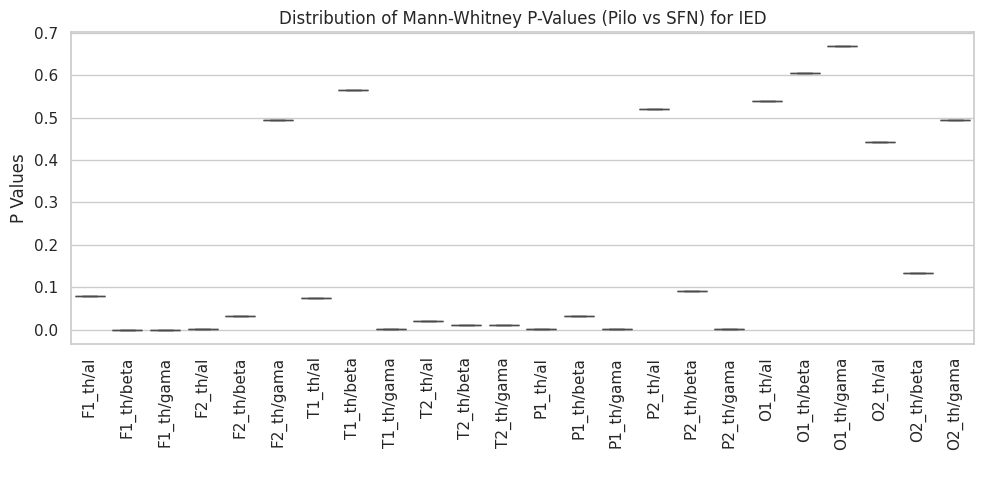

,Column,Stat_4-8_pilo|sfn,P_4-8_pilo|sfn,Stat_12-16_pilo|sfn,P_12-16_pilo|sfn
0,F1_th/al,13789.0,0.07997,48256.0,0.00732
1,F1_th/beta,15678.0,0.00004,44936.0,0.28731
2,F1_th/gama,16931.0,0.00000,55053.0,0.00000
3,F2_th/al,9601.0,0.00059,27135.0,0.00000
4,F2_th/beta,10641.0,0.03177,25656.0,0.00000
5,F2_th/gama,11822.0,0.49374,37362.0,0.00863
6,T1_th/al,10934.0,0.07437,35417.0,0.00035
7,T1_th/beta,11909.0,0.56421,33087.0,0.00000
8,T1_th/gama,14922.0,0.00161,53601.0,0.00000
9,T2_th/al,10507.0,0.02071,30419.0,0.00000


In [49]:
# Comparison of data before and after treatment with Surforafan in 4-8 and 12-16 IED
results = []

for col in columns:
    data_1 = ied_data_p4[col].values
    data_2 = ied_data_s4[col].values
    data_3 = ied_data_p12[col].values
    data_4 = ied_data_s12[col].values



    stat_4, p_4 = mannwhitneyu(data_1, data_2)
    stat_12, p_12 = mannwhitneyu(data_3, data_4)


    results.append({
        'Column': col,
        'Stat_4-8_pilo|sfn': stat_4,
        'P_4-8_pilo|sfn': p_4,
        'Stat_12-16_pilo|sfn': stat_12,
        'P_12-16_pilo|sfn': p_12,
    })

results_ied_df = pd.DataFrame(results)

res_df = pd.DataFrame({
    ' ': columns,
    'P Values': [result['P_4-8_pilo|sfn'] for result in results]
})

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

plt.subplot(1, 1, 1)
sns.boxplot(x=' ', y='P Values', data=res_df)
plt.xticks(rotation=90)
plt.title('Distribution of Mann-Whitney P-Values (Pilo vs SFN) for IED')
print("Results of Mann-Whitney U Test for IED Data between groups without and with SFN treatment")

plt.tight_layout()

plt.savefig('Mann-Whitney test IED Pilo vs SFN.png')
plt.show()

results_ied_df=results_ied_df.round(5)
results_ied_df

Conclusions from the Mann-Whitney U Test for IED Data Between Groups Without and With SFN Treatment

Significant Differences in 4-8 Hour Interval:

For the ratios F1_th/beta, F1_th/gama, F2_th/al, T1_th/gama, P1_th/al, P1_th/gama, and P2_th/gama, the p-values are extremely low (below 0.05), indicating statistically significant differences between the treatment groups.
The T1_th/al, T2_th/al, and T2_th/gama also show significant differences with p-values around or below 0.05.

Significant Differences in 12-16 Hour Interval:

Ratios such as F1_th/al, F1_th/gama, F2_th/al, F2_th/beta, T1_th/al, T1_th/beta, T1_th/gama, T2_th/al, T2_th/beta, T2_th/gama, P1_th/al, P1_th/beta, P1_th/gama, P2_th/al, P2_th/beta, P2_th/gama, O1_th/beta, O1_th/gama all have p-values close to 0, indicating highly significant differences.
Some ratios like O2_th/beta also show significant differences with p-values much less than 0.05.

No Significant Differences:

Ratios like F1_th/al (4-8), F2_th/gama (4-8), and O2_th/al (12-16) have higher p-values, suggesting no significant difference between the groups.

Treatment Impact:
Overall, the data suggest that the SFN treatment had a statistically significant impact on most EEG ratio measures, particularly evident in the 12-16 hour interval, which could imply greater treatment effects over a longer period post-treatment.

Results of Mann-Whitney U Test for MS Data between groups without and with SFN treatment


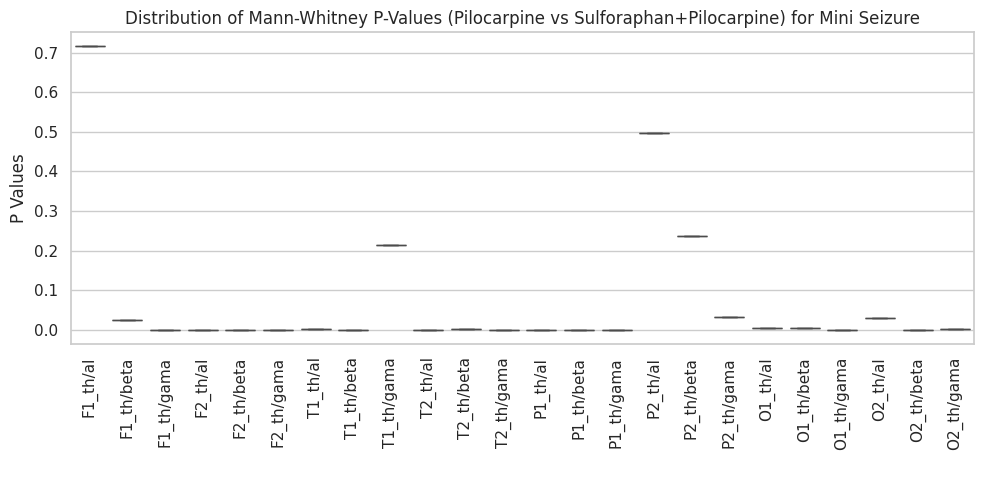

,Column,Stat_4-8_pilo|sfn,P_4-8_pilo|sfn,Stat_12-16_pilo|sfn,P_12-16_pilo|sfn
0,F1_th/al,7117.0,0.71536,20653.0,0.40522
1,F1_th/beta,8533.0,0.02543,19805.0,0.92786
2,F1_th/gama,9402.0,0.00013,24221.0,0.00008
3,F2_th/al,2838.0,0.00000,13305.0,0.00000
4,F2_th/beta,3562.0,0.00000,10786.0,0.00000
5,F2_th/gama,4133.0,0.00000,15268.0,0.00011
6,T1_th/al,5538.0,0.00109,18263.0,0.20858
7,T1_th/beta,5138.0,0.00006,17454.0,0.04940
8,T1_th/gama,7992.0,0.21462,27394.0,0.00000
9,T2_th/al,5172.0,0.00008,16872.0,0.01335


In [50]:
# Comparison of data before and after treatment with Surforaphan in 4-8 and 12-16 mini seizures

results = []

for col in columns:
    data_1 = ms_data_p4[col].values
    data_2 = ms_data_s4[col].values
    data_3 = ms_data_p12[col].values
    data_4 = ms_data_s12[col].values

    stat_4, p_4 = mannwhitneyu(data_1, data_2)
    stat_12, p_12 = mannwhitneyu(data_3, data_4)

    results.append({
        'Column': col,
        'Stat_4-8_pilo|sfn': stat_4,
        'P_4-8_pilo|sfn': p_4,
        'Stat_12-16_pilo|sfn': stat_12,
        'P_12-16_pilo|sfn': p_12,
    })

results_ms_df = pd.DataFrame(results)
print("Results of Mann-Whitney U Test for MS Data between groups without and with SFN treatment")
results_ms_df

# Зразок даних для ілюстрації
res_df = pd.DataFrame({
    ' ': columns,
    'P Values': [result['P_4-8_pilo|sfn'] for result in results]
})

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

plt.subplot(1, 1, 1)
sns.boxplot(x=' ', y='P Values', data=res_df)
plt.xticks(rotation=90)
plt.title('Distribution of Mann-Whitney P-Values (Pilocarpine vs Sulforaphan+Pilocarpine) for Mini Seizure')

plt.tight_layout()
plt.savefig('Mann-Whitney test MS Pilo vs SFN.png')
plt.show()
results_ms_df=results_ms_df.round(5)
results_ms_df

**Summary from the Mann-Whitney U Test for MS Data Between Groups Without and With SFN Treatment**

Significant Differences in the 4-8 Hour Interval:

Several ratios show significant differences with very low p-values, indicating a statistically significant difference between the pilo and SFN treatment groups. These include:
F1_th/beta
F1_th/gama
F2_th/al, F2_th/beta, F2_th/gama
T1_th/al, T1_th/beta, T1_th/gama
T2_th/al, T2_th/beta, T2_th/gama
P1_th/al, P1_th/beta, P1_th/gama
P2_th/gama
O1_th/al, O1_th/beta, O1_th/gama
O2_th/al, O2_th/beta, O2_th/gama
Ratios with p-values close to 0 (extremely significant) indicate a very strong treatment effect for SFN in the 4-8 hour interval.

Significant Differences in the 12-16 Hour Interval:

Similar to the 4-8 hour interval, several ratios show highly significant differences:
F1_th/gama
F2_th/al, F2_th/beta, F2_th/gama
T1_th/gama
T2_th/al, T2_th/beta, T2_th/gama
P2_th/al, P2_th/beta, P2_th/gama
O1_th/al, O1_th/beta
O2_th/beta
Some ratios, such as T1_th/beta, P2_th/al, O2_th/gama, show significant differences with p-values around 0.05, indicating a moderate treatment effect.

No Significant Differences:

Ratios like F1_th/al (both intervals), T1_th/al (12-16), P1_th/al (12-16), P1_th/gama (12-16), P2_th/al (4-8), O1_th/gama (12-16), O2_th/al (12-16) show higher p-values, suggesting no significant difference between the groups in these specific measures.
Some ratios have borderline significant p-values, indicating that the effect might not be strong or consistent across all data points.

Treatment Impact:

The results suggest that SFN treatment significantly impacts several EEG ratio measures, particularly evident in the 4-8 hour interval.
The significant differences in many EEG ratios after SFN treatment indicate that SFN affects the EEG activity during MS events.

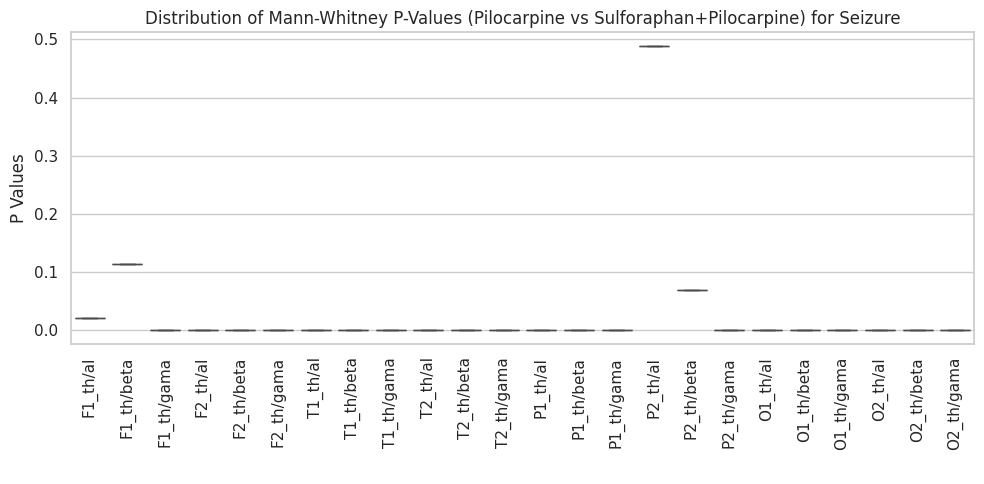

,Column,Stat_4-8_pilo|sfn,P_4-8_pilo|sfn,Stat_12-16_pilo|sfn,P_12-16_pilo|sfn
0,F1_th/al,41896.0,0.02010,161941.0,0.41871
1,F1_th/beta,50534.0,0.11247,154287.0,0.03110
2,F1_th/gama,59964.0,0.00000,209403.0,0.00000
3,F2_th/al,17989.0,0.00000,88673.0,0.00000
4,F2_th/beta,28787.0,0.00000,63120.0,0.00000
5,F2_th/gama,25387.0,0.00000,110564.0,0.00000
6,T1_th/al,28137.0,0.00000,133218.0,0.00000
7,T1_th/beta,31590.0,0.00000,118073.0,0.00000
8,T1_th/gama,59176.0,0.00000,246221.0,0.00000
9,T2_th/al,30161.0,0.00000,118568.0,0.00000


<Figure size 640x480 with 0 Axes>

In [51]:
# Comparison of data before and after treatment with Surforafan in 4-8 and 12-16 seizures
results = []

for col in columns:
    data_1 = sei_data_p4[col].values
    data_2 = sei_data_s4[col].values
    data_3 = sei_data_p12[col].values
    data_4 = sei_data_s12[col].values

    stat_4, p_4 = mannwhitneyu(data_1, data_2)
    stat_12, p_12 = mannwhitneyu(data_3, data_4)

    results.append({
        'Column': col,
        'Stat_4-8_pilo|sfn': stat_4,
        'P_4-8_pilo|sfn': p_4,
        'Stat_12-16_pilo|sfn': stat_12,
        'P_12-16_pilo|sfn': p_12,
    })

results_sei_df = pd.DataFrame(results)

res_df = pd.DataFrame({
    ' ': columns,
    'P Values': [result['P_4-8_pilo|sfn'] for result in results]
})

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

plt.subplot(1, 1, 1)
sns.boxplot(x=' ', y='P Values', data=res_df)
plt.xticks(rotation=90)
plt.title('Distribution of Mann-Whitney P-Values (Pilocarpine vs Sulforaphan+Pilocarpine) for Seizure')

plt.tight_layout()
plt.show()
plt.savefig('Mann-Whitney test Seizure Pilo vs SFN.png')
results_sei_df.round(5)


Summary of Mann-Whitney U Test Results for SEIZURE Data Between Groups Without and With SFN Treatment

Significant Differences in the 4-8 Hour Interval:

F1_th/gama
F2_th/al, F2_th/beta, F2_th/gama
T1_th/al, T1_th/beta, T1_th/gama
T2_th/al, T2_th/beta, T2_th/gama
P1_th/al, P1_th/beta, P1_th/gama
P2_th/gama
O1_th/al, O1_th/beta, O1_th/gama
O2_th/al, O2_th/beta, O2_th/gama

Significant Differences in the 12-16 Hour Interval:

F1_th/gama
F2_th/al, F2_th/beta, F2_th/gama
T1_th/al, T1_th/beta, T1_th/gama
T2_th/al, T2_th/beta, T2_th/gama
P1_th/al, P1_th/beta
P2_th/al, P2_th/beta, P2_th/gama
O1_th/al, O1_th/beta, O1_th/gama
O2_th/beta, O2_th/gama

No Significant Differences:

There are few ratios with higher p-values indicating no significant differences, such as F1_th/al in the 12-16 hour interval, which has a p-value of 0.41871.
Implications of Treatment:
The consistent and highly significant p-values across most EEG ratios suggest that SFN treatment has a substantial effect on EEG activity during SE events.
The results imply that SFN treatment may lead to significant alterations in brain activity patterns associated with SE events, particularly in both observed time intervals.

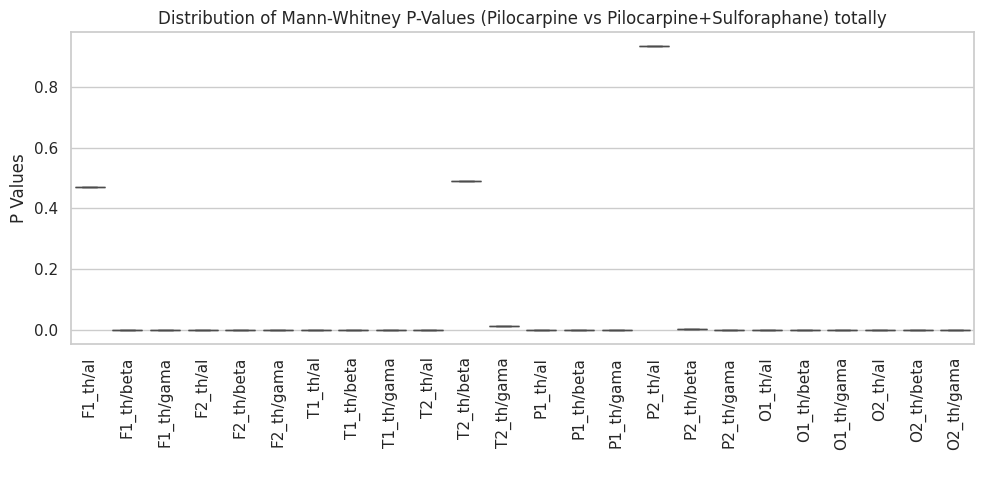

,Column,Stat_4-8_pilo|sfn,P_4-8_pilo|sfn,Stat_12-16_pilo|sfn,P_12-16_pilo|sfn
0,F1_th/al,167513.0,0.46897,586241.0,0.31001
1,F1_th/beta,198213.0,0.00001,554108.0,0.21879
2,F1_th/gama,224272.0,0.00000,712005.0,0.00000
3,F2_th/al,87884.0,0.00000,340627.0,0.00000
4,F2_th/beta,119033.0,0.00000,283134.0,0.00000
5,F2_th/gama,120484.0,0.00000,426726.0,0.00000
6,T1_th/al,124410.0,0.00000,480236.0,0.00000
7,T1_th/beta,135512.0,0.00000,445171.0,0.00000
8,T1_th/gama,207595.0,0.00000,776356.0,0.00000
9,T2_th/al,123945.0,0.00000,424432.0,0.00000


In [52]:
# # Comparison of data before and after treatment with Surforafan in 4-8 and 12-16 all data
results = []

for col in columns:
    data_1 = df_4_pilo[col].values
    data_2 = df_4_sfn[col].values
    data_3 = df_12_pilo[col].values
    data_4 = df_12_sfn[col].values

    stat_4, p_4 = mannwhitneyu(data_1, data_2)
    stat_12, p_12 = mannwhitneyu(data_3, data_4)

    results.append({
        'Column': col,
        'Stat_4-8_pilo|sfn': stat_4,
        'P_4-8_pilo|sfn': p_4,
        'Stat_12-16_pilo|sfn': stat_12,
        'P_12-16_pilo|sfn': p_12,
    })
results_df = pd.DataFrame(results)

res_df = pd.DataFrame({
    ' ': columns,
    'P Values': [result['P_4-8_pilo|sfn'] for result in results]
})

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

plt.subplot(1, 1, 1)
sns.boxplot(x=' ', y='P Values', data=res_df)
plt.xticks(rotation=90)
plt.title('Distribution of Mann-Whitney P-Values (Pilocarpine vs Pilocarpine+Sulforaphane) totally')

plt.tight_layout()
plt.savefig('Mann-Whitney test Pilo vs SFN.png')
plt.show()
results_df.round(5)

 **Summary**
The Mann-Whitney U test results reveal that SFN treatment significantly impacts EEG ratios during SE events, with a pronounced effect across both the 4-8 and 12-16 hour intervals. These findings suggest that SFN could play a role in modifying brain activity during epileptical events, potentially offering therapeutic benefits. Further research is recommended to explore these effects in greater detail and to understand the mechanisms underlying the observed changes.

Summary of Treatment Impacts:

The consistent and highly significant p-values across most EEG ratios suggest that SFN treatment has a substantial effect on EEG activity during epileptical events.

In [53]:
!pip install pandas xlsxwriter
import xlsxwriter

In [54]:
with pd.ExcelWriter('MW_Utest_for_PILO_vs_SFN.xlsx', engine='xlsxwriter') as writer:
    results_ied_df.to_excel(writer, sheet_name='ied', index=True)
    results_ms_df.to_excel(writer, sheet_name='ms', index=True)
    results_sei_df.to_excel(writer, sheet_name='sei', index=True)
    results_df.to_excel(writer, sheet_name='total', index=True)

In [55]:
column_replacement = {
    'F1_th/al': 'F1', 'F2_th/al': 'F2', 'T1_th/al': 'T1', 'T2_th/al': 'T2',
    'P1_th/al': 'P1', 'P2_th/al': 'P2', 'O1_th/al': 'O1', 'O2_th/al': 'O2',
    'F1_th/beta': 'F1', 'F2_th/beta': 'F2', 'T1_th/beta': 'T1', 'T2_th/beta': 'T2',
    'P1_th/beta': 'P1', 'P2_th/beta': 'P2', 'O1_th/beta': 'O1', 'O2_th/beta': 'O2',
    'F1_th/gama': 'F1', 'F2_th/gama': 'F2', 'T1_th/gama': 'T1', 'T2_th/gama': 'T2',
    'P1_th/gama': 'P1', 'P2_th/gama': 'P2', 'O1_th/gama': 'O1', 'O2_th/gama': 'O2'
}

# Розділення колонок на три групи
groups = {
    'Theta/Alpha': ['F1_th/al', 'F2_th/al', 'T1_th/al', 'T2_th/al', 'P1_th/al', 'P2_th/al', 'O1_th/al', 'O2_th/al'],
    'Theta/Beta': ['F1_th/beta', 'F2_th/beta', 'T1_th/beta', 'T2_th/beta', 'P1_th/beta', 'P2_th/beta', 'O1_th/beta', 'O2_th/beta'],
    'Theta/Gamma': ['F1_th/gama', 'F2_th/gama', 'T1_th/gama', 'T2_th/gama', 'P1_th/gama', 'P2_th/gama', 'O1_th/gama', 'O2_th/gama']
}

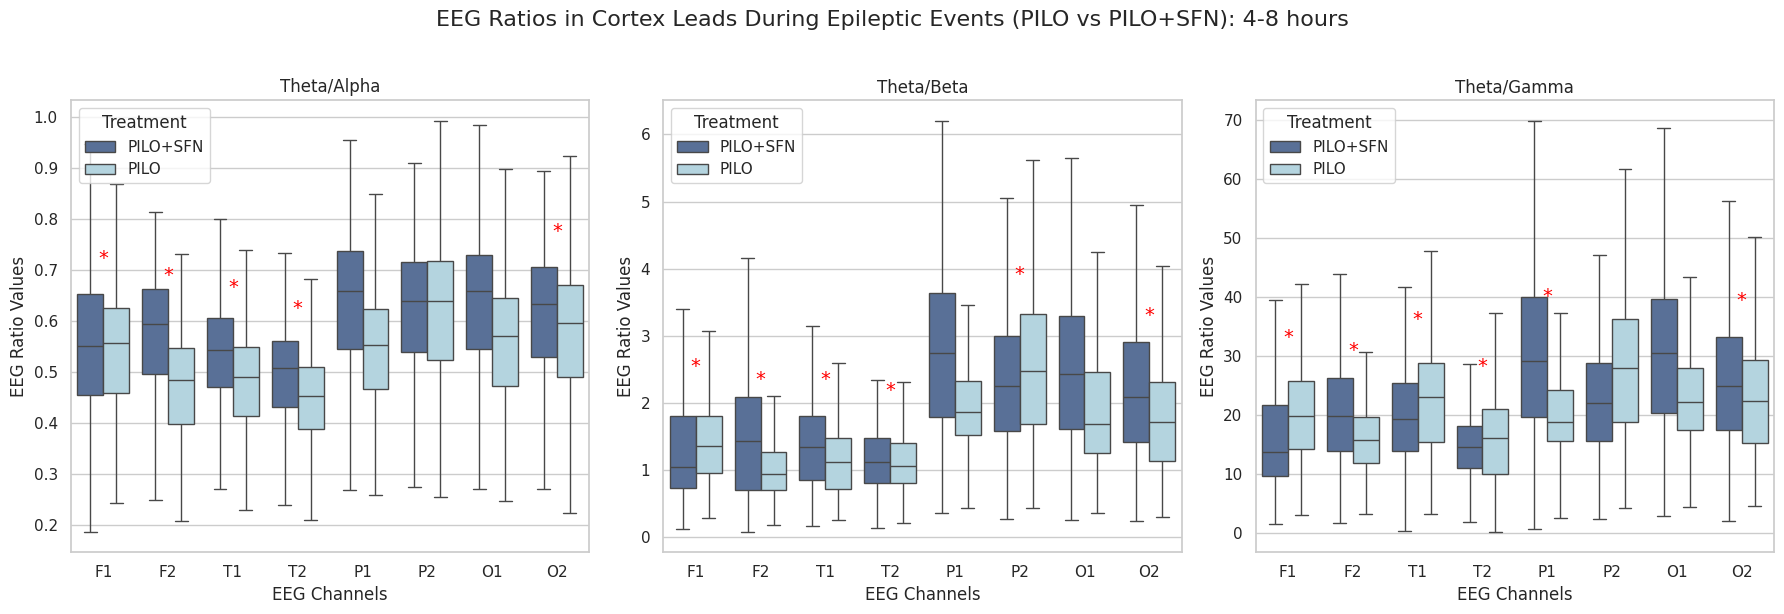

In [56]:
# Visulazation Mann-Whitney U test, p-values by ratios with total data with Pilocarpine+Sulpharafane treatment in the time period 4-8 hours

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for ax, (group_name, group_columns) in zip(axes, groups.items()):
    # Create data for PILO+SFN group
    data_4_sfn = df_4_sfn[group_columns].copy()
    data_4_sfn['Treatment'] = 'PILO+SFN'

    # Create data for PILO group
    data_4_pilo = df_4_pilo[group_columns].copy()
    data_4_pilo['Treatment'] = 'PILO'

    # Combine all data for the current group
    combined_data = pd.concat([data_4_sfn, data_4_pilo], ignore_index=True)
    plot_data = pd.melt(combined_data, id_vars=['Treatment'], value_vars=group_columns,
                        var_name='Channel', value_name='Value')
    plot_data['Channel'] = plot_data['Channel'].replace(column_replacement)

    # Plot boxplot to show differences between treatments and intervals
    sns.boxplot(x='Channel', y='Value', hue='Treatment', data=plot_data, ax=ax, showfliers=False,
                palette={"PILO": "lightblue", "PILO+SFN": "#4f6da1"})
    ax.set_title(group_name)
    ax.set_ylabel('EEG Ratio Values')
    ax.set_xlabel('EEG Channels')
    ax.legend(title='Treatment', loc='upper left')

    # Iterate through group columns to add significance asterisks
    for i, channel in enumerate(group_columns):
        if channel in mw_results_df.index and mw_results_df.loc[channel, 'p_value'] < 0.05:
            y_max = plot_data[plot_data['Channel'] == column_replacement[channel]]['Value'].quantile(0.75)

            # Determine the y-offset based on the EEG ratio being processed
            if 'th/al' in channel.lower():
                y_max_offset = y_max + 0.07
            elif 'th/beta' in channel.lower():
                y_max_offset = y_max + 0.6
            elif 'th/gama' in channel.lower():
                y_max_offset = y_max + 7
            else:
                y_max_offset = y_max + 0.1

            # Add the asterisk for significant p-value
            ax.text(i, y_max_offset, '*', ha='center', va='bottom', color='red', fontsize=14)

# Set the overall title and layout
plt.suptitle('EEG Ratios in Cortex Leads During Epileptic Events (PILO vs PILO+SFN): 4-8 hours', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('Mannwhitneyu_test_Pilo_vs_Pilo_SFN_4-8_hours.png')
plt.show()


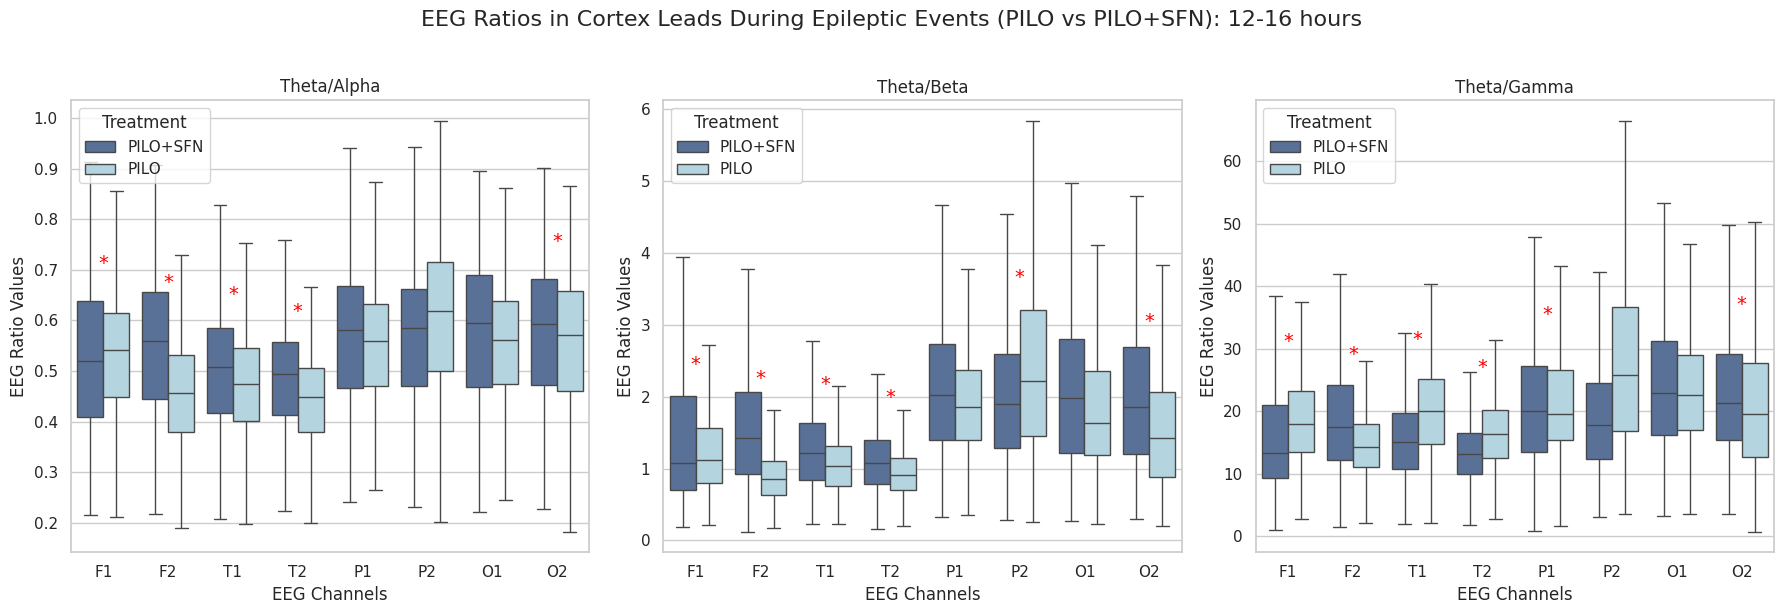

In [57]:
# Visulazation Mann-Whitney U test, p-values by ratios with total data with Pilocarpine+Sulpharafane treatment in the time period 12-16 hours

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for ax, (group_name, group_columns) in zip(axes, groups.items()):

    # Create data for PILO+SFN group
    data_12_sfn = df_12_sfn[group_columns].copy()
    data_12_sfn['Treatment'] = 'PILO+SFN'

    # Create data for PILO group

    data_12_pilo = df_12_pilo[group_columns].copy()
    data_12_pilo['Treatment'] = 'PILO'

    # Combine all data for the current group
    combined_data = pd.concat([data_12_sfn, data_12_pilo], ignore_index=True)
    plot_data = pd.melt(combined_data, id_vars=['Treatment'], value_vars=group_columns,
                        var_name='Channel', value_name='Value')
    plot_data['Channel'] = plot_data['Channel'].replace(column_replacement)

    # Plot boxplot to show differences between treatments and intervals
    sns.boxplot(x='Channel', y='Value', hue='Treatment', data=plot_data, ax=ax, showfliers=False,
                palette={"PILO": "lightblue", "PILO+SFN": "#4f6da1"})
    ax.set_title(group_name)
    ax.set_ylabel('EEG Ratio Values')
    ax.set_xlabel('EEG Channels')
    ax.legend(title='Treatment', loc='upper left')

    # Iterate through group columns to add significance asterisks
    for i, channel in enumerate(group_columns):
        if channel in mw_results_df.index and mw_results_df.loc[channel, 'p_value'] < 0.05:
            y_max = plot_data[plot_data['Channel'] == column_replacement[channel]]['Value'].quantile(0.75)

            # Determine the y-offset based on the EEG ratio being processed
            if 'th/al' in channel.lower():
                y_max_offset = y_max + 0.07
            elif 'th/beta' in channel.lower():
                y_max_offset = y_max + 0.6
            elif 'th/gama' in channel.lower():
                y_max_offset = y_max + 7
            else:
                y_max_offset = y_max + 0.1

            # Add the asterisk for significant p-value
            ax.text(i, y_max_offset, '*', ha='center', va='bottom', color='red', fontsize=14)

# Set the overall title and layout
plt.suptitle('EEG Ratios in Cortex Leads During Epileptic Events (PILO vs PILO+SFN): 12-16 hours', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('Mannwhitneyu_test_Pilo_vs_Pilo_SFN_12-16_hours.png')
plt.show()

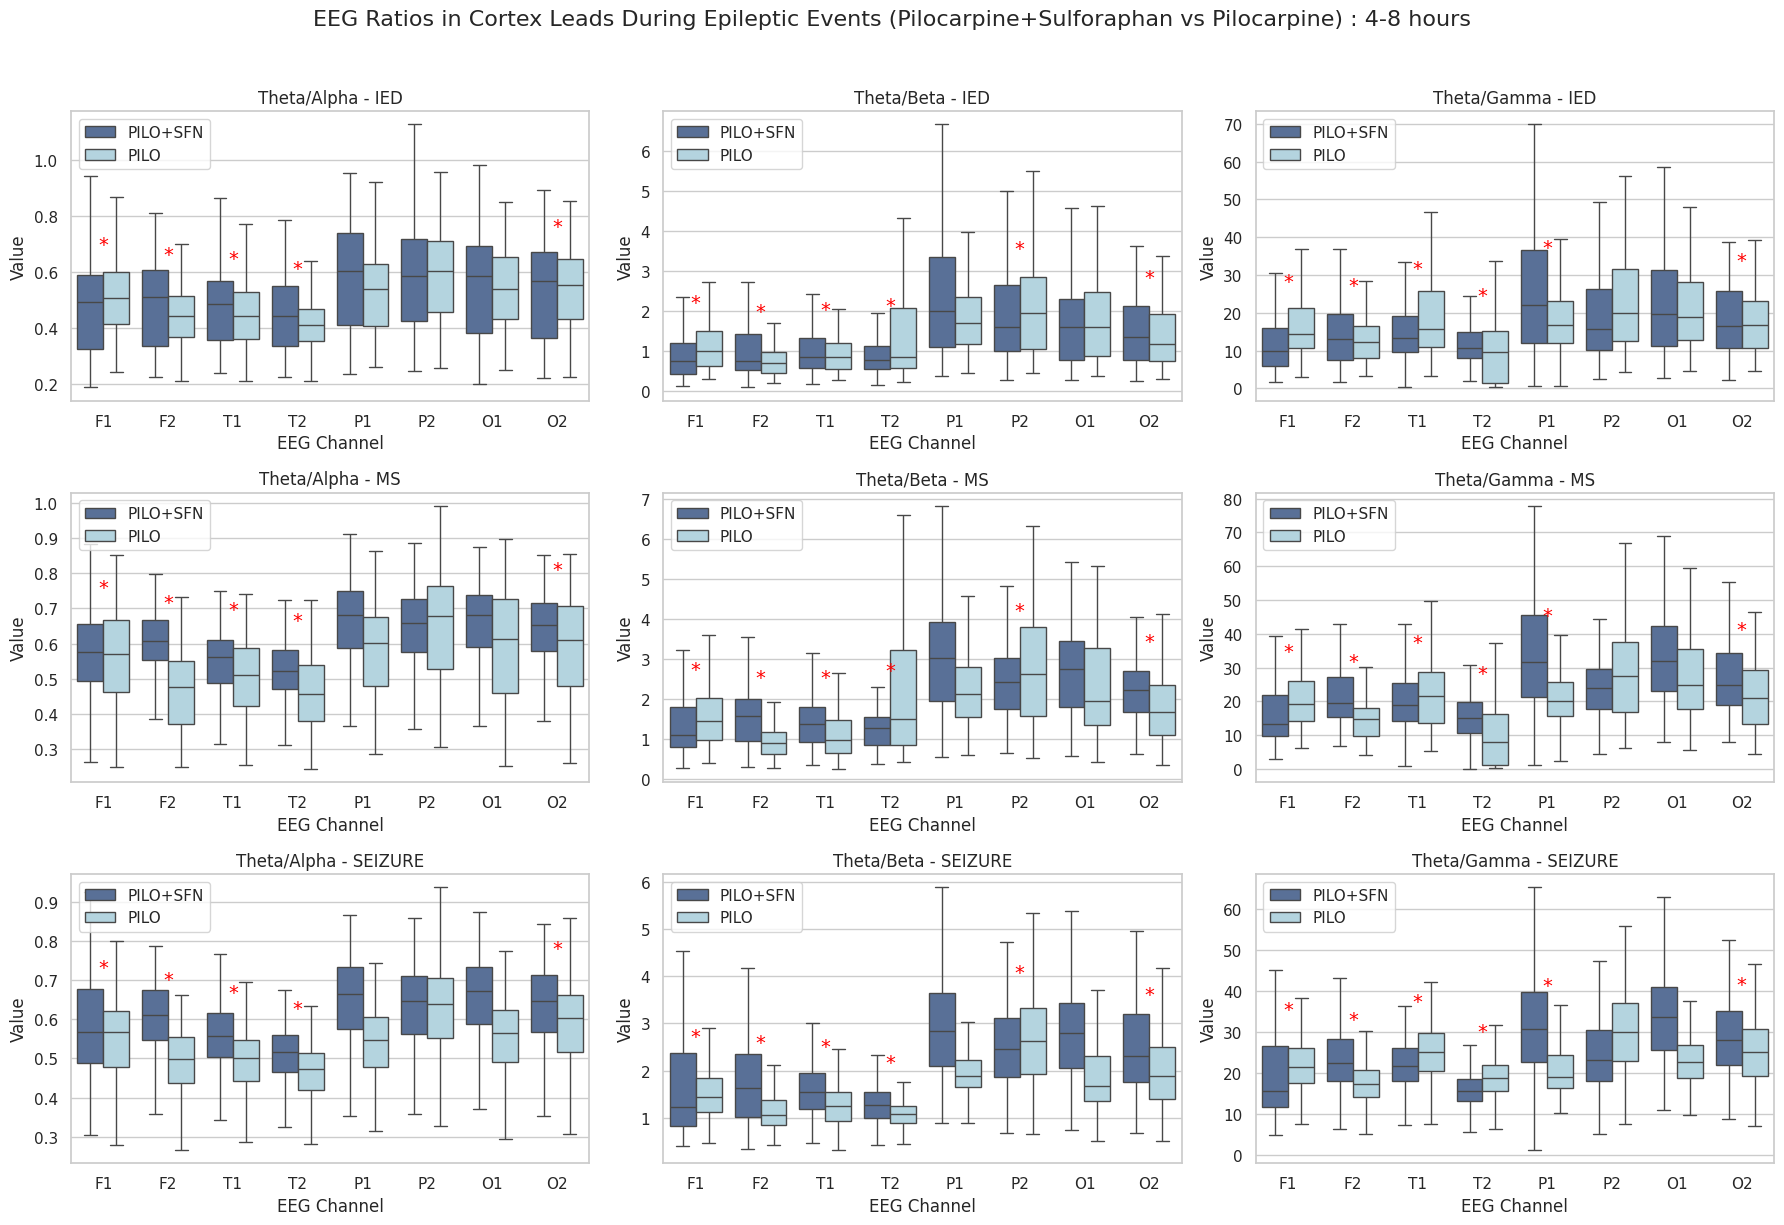

In [58]:
# Visulazation Mann-Whitney U test, p-values by ratios with Pilocarpine+Sulpharafane treatment in the time period 4-8 hours by epileptical events
fig, axes = plt.subplots(nrows=len(conditions), ncols=len(groups), figsize=(18, 12))

# Iterate over conditions and EEG ratios
for i, condition in enumerate(conditions):
    for j, (group_name, group_columns) in enumerate(groups.items()):

        # Filter data for the current condition (IED, MS, Seizure)
        df_condition_sfn = df_4_sfn[df_4_sfn['Event_type'] == condition]
        df_condition_pilo = df_4_pilo[df_4_pilo['Event_type'] == condition]

        # Prepare data for plotting
        data_4_sfn = df_condition_sfn[group_columns].copy()
        data_4_sfn['Treatment'] = 'PILO+SFN'
        data_4_pilo = df_condition_pilo[group_columns].copy()
        data_4_pilo['Treatment'] = 'PILO'

        # Combine data
        combined_data = pd.concat([data_4_sfn, data_4_pilo], ignore_index=True)
        plot_data = pd.melt(combined_data, id_vars=['Treatment'], value_vars=group_columns,
                            var_name='Channel', value_name='Value')
        plot_data['Channel'] = plot_data['Channel'].replace(column_replacement)

        # Plot boxplot
        ax = axes[i, j]  # Get the subplot for the current condition and EEG ratio
        sns.boxplot(x='Channel', y='Value', hue='Treatment', data=plot_data, ax=ax, showfliers=False,
                    palette={"PILO": "lightblue", "PILO+SFN": "#4f6da1"})

        # Set the title and labels
        ax.set_title(f'{group_name} - {condition}')
        ax.set_ylabel('Value')
        ax.set_xlabel('EEG Channel')
        ax.legend(loc='upper left')

        # Add red asterisks for significant p-values from Mann-Whitney U test
        for k, channel in enumerate(group_columns):
            if channel in mw_results_df.index and mw_results_df.loc[channel, 'p_value'] < 0.05:
                # Get the upper quartile (75th percentile) value for the channel in the current subplot
                y_max = plot_data[plot_data['Channel'] == column_replacement[channel]]['Value'].quantile(0.75)

                # Adjust the offset for the y_max based on EEG ratio
                if 'th/al' in channel.lower():
                    y_max_offset = y_max + 0.07
                elif 'th/beta' in channel.lower():
                    y_max_offset = y_max + 0.6
                elif 'th/gama' in channel.lower():
                    y_max_offset = y_max + 7
                else:
                    y_max_offset = y_max + 0.1

                # Add the asterisk for significant p-value
                ax.text(k, y_max_offset, '*', ha='center', va='bottom', color='red', fontsize=14)

plt.suptitle('EEG Ratios in Cortex Leads During Epileptic Events (Pilocarpine+Sulforaphan vs Pilocarpine) : 4-8 hours', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('Mannwhitneyu test PILO+SFN vs PILO hours 4-8 by events.png')
plt.show()

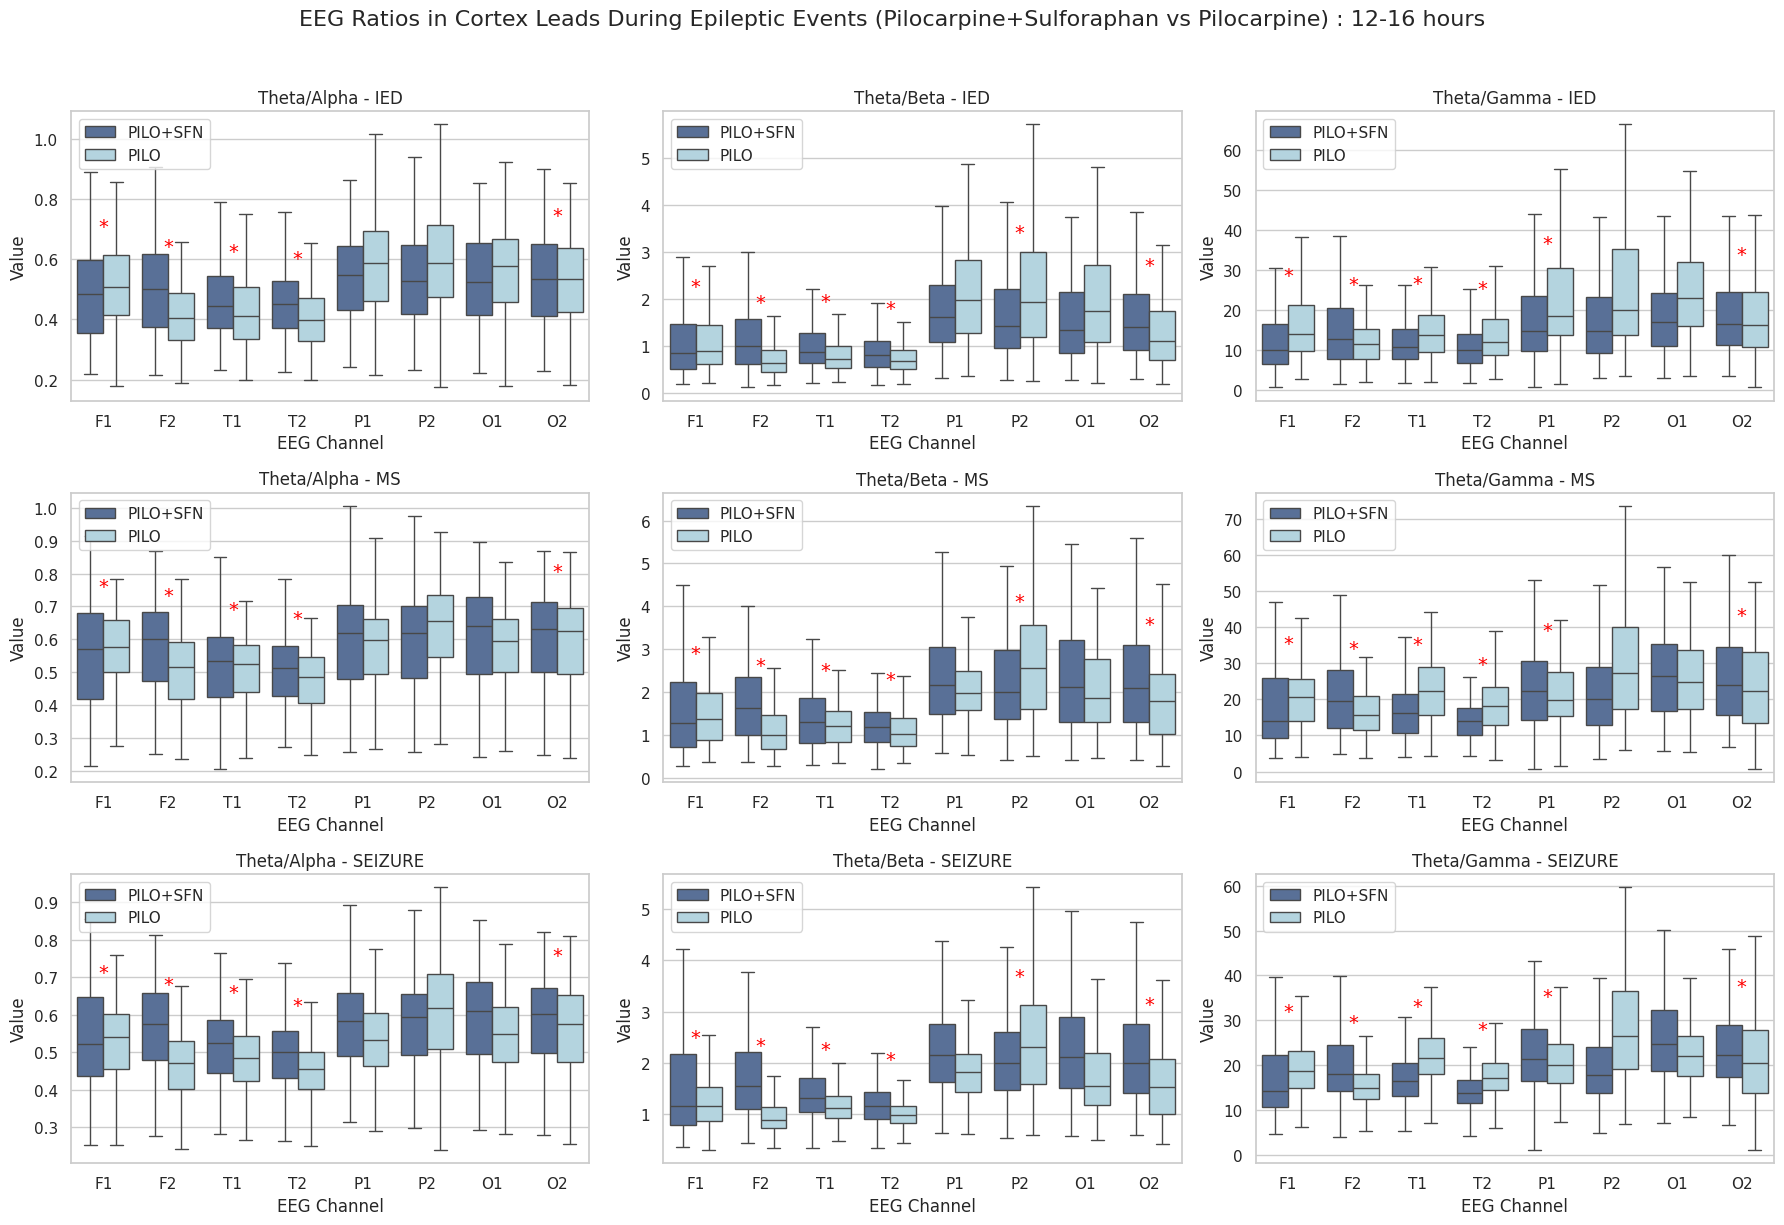

In [59]:
# Visulazation Mann-Whitney U test, p-values by ratios with Pilocarpine+Sulpharafane treatment in the time period 12-16 hours by epileptical events
fig, axes = plt.subplots(nrows=len(conditions), ncols=len(groups), figsize=(18, 12))

# Iterate over conditions and EEG ratios
for i, condition in enumerate(conditions):
    for j, (group_name, group_columns) in enumerate(groups.items()):

        # Filter data for the current condition (IED, MS, Seizure)
        df_condition_sfn = df_12_sfn[df_12_sfn['Event_type'] == condition]
        df_condition_pilo = df_12_pilo[df_12_pilo['Event_type'] == condition]

        # Prepare data for plotting
        data_12_sfn = df_condition_sfn[group_columns].copy()
        data_12_sfn['Treatment'] = 'PILO+SFN'
        data_12_pilo = df_condition_pilo[group_columns].copy()
        data_12_pilo['Treatment'] = 'PILO'

        # Combine data
        combined_data = pd.concat([data_12_sfn, data_12_pilo], ignore_index=True)
        plot_data = pd.melt(combined_data, id_vars=['Treatment'], value_vars=group_columns,
                            var_name='Channel', value_name='Value')
        plot_data['Channel'] = plot_data['Channel'].replace(column_replacement)

        # Plot boxplot
        ax = axes[i, j]  # Get the subplot for the current condition and EEG ratio
        sns.boxplot(x='Channel', y='Value', hue='Treatment', data=plot_data, ax=ax, showfliers=False,
                    palette={"PILO": "lightblue", "PILO+SFN": "#4f6da1"})

        # Set the title and labels
        ax.set_title(f'{group_name} - {condition}')
        ax.set_ylabel('Value')
        ax.set_xlabel('EEG Channel')
        ax.legend(loc='upper left')

        # Add red asterisks for significant p-values from Mann-Whitney U test
        for k, channel in enumerate(group_columns):
            if channel in mw_results_df.index and mw_results_df.loc[channel, 'p_value'] < 0.05:
                # Get the upper quartile (75th percentile) value for the channel in the current subplot
                y_max = plot_data[plot_data['Channel'] == column_replacement[channel]]['Value'].quantile(0.75)

                # Adjust the offset for the y_max based on EEG ratio
                if 'th/al' in channel.lower():
                    y_max_offset = y_max + 0.07
                elif 'th/beta' in channel.lower():
                    y_max_offset = y_max + 0.6
                elif 'th/gama' in channel.lower():
                    y_max_offset = y_max + 7
                else:
                    y_max_offset = y_max + 0.1

                # Add the asterisk for significant p-value
                ax.text(k, y_max_offset, '*', ha='center', va='bottom', color='red', fontsize=14)

plt.suptitle('EEG Ratios in Cortex Leads During Epileptic Events (Pilocarpine+Sulforaphan vs Pilocarpine) : 12-16 hours', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('Mannwhitneyu test PILO+SFN vs PILO hours 12-16 by events.png')
plt.show()

# Correlation analysis of input variable to frequency (per hour) and duration epileptic events as to output variable

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [61]:
totall_df.columns

Index(['Example_names', 'F1_th/al', 'F1_th/beta', 'F1_th/gama', 'F2_th/al',
       'F2_th/beta', 'F2_th/gama', 'T1_th/al', 'T1_th/beta', 'T1_th/gama',
       'T2_th/al', 'T2_th/beta', 'T2_th/gama', 'P1_th/al', 'P1_th/beta',
       'P1_th/gama', 'P2_th/al', 'P2_th/beta', 'P2_th/gama', 'O1_th/al',
       'O1_th/beta', 'O1_th/gama', 'O2_th/al', 'O2_th/beta', 'O2_th/gama',
       'Example', 'Day_time_h', 'Event_type', 'SFN_treat', 'Num_per_h',
       'Dur_per_h'],
      dtype='object')

In [62]:
numerical_features = ['F1_th/al', 'F1_th/beta', 'F1_th/gama', 'F2_th/al',
       'F2_th/beta', 'F2_th/gama', 'T1_th/al', 'T1_th/beta', 'T1_th/gama',
       'T2_th/al', 'T2_th/beta', 'T2_th/gama', 'P1_th/al', 'P1_th/beta',
       'P1_th/gama', 'P2_th/al', 'P2_th/beta', 'P2_th/gama', 'O1_th/al',
       'O1_th/beta', 'O1_th/gama', 'O2_th/al', 'O2_th/beta', 'O2_th/gama']
categorical_features = ['Day_time_h', 'Event_type', 'SFN_treat', 'Num_per_h',
       'Dur_per_h']

In [63]:
# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)  # OneHot encoding for categorical features
    ]
)

# Apply the transformation to your dataset
X_transformed = preprocessor.fit_transform(totall_df)

In [64]:
# Convert the result into a DataFrame with proper column names
# Get the one-hot encoded feature names
cat_columns = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)

# Combine the numerical features and one-hot encoded columns
all_columns = numerical_features + list(cat_columns)

# Convert to DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)

# Display the DataFrame with the new column names
X_transformed_df.columns

Index(['F1_th/al', 'F1_th/beta', 'F1_th/gama', 'F2_th/al', 'F2_th/beta',
       'F2_th/gama', 'T1_th/al', 'T1_th/beta', 'T1_th/gama', 'T2_th/al',
       ...
       'Dur_per_h_314.8571428571425', 'Dur_per_h_320.7912087912089',
       'Dur_per_h_327.8681318681318', 'Dur_per_h_335.2527472527475',
       'Dur_per_h_344.57142857142856', 'Dur_per_h_347.03296703296706',
       'Dur_per_h_412.65934065934096', 'Dur_per_h_422.0219780219778',
       'Dur_per_h_461.3186813186815', 'Dur_per_h_615.6483516483516'],
      dtype='object', length=286)

In [69]:

# Add columns for frequence and duration
dur_columns = columns + ['Dur_per_h']
num_columns = columns + ['Num_per_h']

# Calculate correlation (Pearson) between features for each column
correlation_matrix_dur = totall_df[dur_columns].corr()
correlation_matrix_num = totall_df[num_columns].corr()

# Coorrelation between features and 'Dur_per_h'
correlation_with_dur_per_h = correlation_matrix_dur['Dur_per_h'].drop('Dur_per_h')

# Coorrelation between features and 'Num_per_h'
correlation_with_num_per_h = correlation_matrix_num['Num_per_h'].drop('Num_per_h')

In [78]:
# Print coorrelation between features and 'Dur_per_h' (top 10 features)
correlation_with_dur_per_h.sort_values(ascending= False).head(10)

,Dur_per_h
T1_th/beta,0.215104
F2_th/beta,0.204675
O2_th/beta,0.202710
T1_th/al,0.187572
T2_th/al,0.187123
O2_th/gama,0.182649
F2_th/al,0.169543
F2_th/gama,0.165065
O2_th/al,0.153719
P2_th/beta,0.137633


The level of correlation of EEG frequency ratios with the frequency of epileptic events was not high. The presented data reflect the most sensitive correlation relationships between EEG data and the duration or frequency of epileptic events per unit of time (hour). The highest correlation with the frequency of epileptic seizures is found in the theta-beta ratio in the left temporal and right frontal and occipital regions, theta-alpha in the symmetrical temporal lobes, and theta-gamma in the right occipital lobe.

In [79]:
# Print coorrelation between features and 'Num_per_h' (top 10 features)
correlation_with_num_per_h.sort_values(ascending= False).head(10)

,Num_per_h
O1_th/beta,0.197093
T2_th/beta,0.183846
P1_th/beta,0.158046
O1_th/al,0.150389
O1_th/gama,0.132368
P1_th/al,0.131073
F1_th/al,0.117362
P2_th/beta,0.089119
P2_th/al,0.087171
O2_th/al,0.063013


The level of correlation of EEG frequency ratios with the frequency of epileptic events was not high and lower then duration per hour. The presented data reflect the most sensitive correlation relationships between EEG data and the duration or frequency of epileptic events per unit of time (hour). The highest correlation with the frequency of epileptic seizures is found in the theta-beta ratio in the left occipital, temporal, and right temporal regions, as well as theta-alpha and theta-gamma ratios in the left occipital lobe.